# <CENTER> AGE AND GENDER DETECTION USING OPEN-CV <CENTER>
   <CENTER> TEAM MEMBERS <CENTER>
   <CENTER> VISHNU DAS BHARATHRAJ<CENTER>
    <CENTER> VENKATA SURYA VAMSHI MANNE<CENTER>
     <CENTER> PRITHVI HARDHIKAR<CENTER>

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from keras.models import Sequential,load_model,Model
from keras.layers import Conv2D,MaxPool2D,Dense,Dropout,BatchNormalization,Flatten,Input
from sklearn.model_selection import train_test_split
import cv2
import math
import time
import argparse
from keras.models import load_model
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns

## Data Pre-processing

In [2]:
path = r"C:\Users\user\Desktop\age _and _gender\pat_rec_proj\UTKFace\UTKFace"
image_list = []
age_list = []
gender_list = []

for img in os.listdir(path):
    age_model = img.split("_")[0]
    gender_model = img.split("_")[1]
    image = cv2.imread(str(path)+"/"+str(img))
    image = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    images.append(np.array(img))
    age.append(np.array(ages))
    gender.append(np.array(genders))

In [3]:
age_array = np.array(age_list,dtype=np.int64)
images_array = np.array(image_list)/255
gender_array = np.array(gender_list,np.uint64)

## Training Model for Age

In [4]:
age_train, age_test, age_train_y, age_test_y = train_test_split(images_array, age_array, random_state=42)

## Training Model for Gender

In [5]:
gender_train, gender_test, gender_train_y, gender_test_y = train_test_split(images_array, gender_array, random_state=42)

## Building Model for Age

In [6]:
age = Sequential()
age.add(Conv2D(128, kernel_size=3, activation='relu', input_shape=(200,200,3)))
age.add(MaxPool2D(pool_size=3, strides=2))

age.add(Conv2D(128, kernel_size=3, activation='relu'))
age.add(MaxPool2D(pool_size=3, strides=2))
              
age.add(Conv2D(256, kernel_size=3, activation='relu'))
age.add(MaxPool2D(pool_size=3, strides=2))

age.add(Conv2D(512, kernel_size=3, activation='relu'))
age.add(MaxPool2D(pool_size=3, strides=2))

age.add(Flatten())
age.add(Dropout(0.2))
age.add(Dense(512, activation='relu'))

age.add(Dense(1, activation='linear', name='age'))
              
age.compile(optimizer='adam', loss='mse', metrics=['mae'])
print(age.summary())              
                           
age_summary = age.fit(age_train, age_train_y,
                        validation_data=(age_test, age_test_y), epochs=25)

age.save('model_age.h5')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 98, 98, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 47, 47, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 22, 22, 256)      0

## Building Model For Gender

In [7]:
gender = Sequential()

gender.add(Conv2D(36, kernel_size=3, activation='relu', input_shape=(200,200,3)))

gender.add(MaxPool2D(pool_size=3, strides=2))
gender.add(Conv2D(64, kernel_size=3, activation='relu'))
gender.add(MaxPool2D(pool_size=3, strides=2))

gender.add(Conv2D(128, kernel_size=3, activation='relu'))
gender.add(MaxPool2D(pool_size=3, strides=2))

gender.add(Conv2D(256, kernel_size=3, activation='relu'))
gender.add(MaxPool2D(pool_size=3, strides=2))

gender.add(Conv2D(512, kernel_size=3, activation='relu'))
gender.add(MaxPool2D(pool_size=3, strides=2))

gender.add(Flatten())
gender.add(Dropout(0.2))
gender.add(Dense(512, activation='relu'))
gender.add(Dense(1, activation='sigmoid', name='gender'))

gender.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

gender_summary = gender.fit(gender_train, gender_train_y,
                        validation_data=(gender_test, gender_train_y), epochs=25)

gender.save('model_gender.h5')


Epoch 1/25
10/10 [==============================] - 22s 2s/step - loss: 0.7545 - accuracy: 0.5497 - val_loss: 0.7121 - val_accuracy: 0.4653
Epoch 2/25
10/10 [==============================] - 19s 2s/step - loss: 0.6805 - accuracy: 0.5960 - val_loss: 0.7460 - val_accuracy: 0.4653
Epoch 3/25
10/10 [==============================] - 19s 2s/step - loss: 0.6798 - accuracy: 0.5960 - val_loss: 0.7301 - val_accuracy: 0.4653
Epoch 4/25
10/10 [==============================] - 18s 2s/step - loss: 0.6730 - accuracy: 0.5960 - val_loss: 0.7177 - val_accuracy: 0.4653
Epoch 5/25
10/10 [==============================] - 18s 2s/step - loss: 0.6737 - accuracy: 0.5960 - val_loss: 0.7000 - val_accuracy: 0.4653
Epoch 6/25
10/10 [==============================] - 18s 2s/step - loss: 0.6669 - accuracy: 0.5960 - val_loss: 0.6991 - val_accuracy: 0.4653
Epoch 7/25
10/10 [==============================] - 18s 2s/step - loss: 0.6382 - accuracy: 0.5960 - val_loss: 0.7133 - val_accuracy: 0.4653
Epoch 8/25
10/10 [==

In [8]:
print(gender.summary()) 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 198, 198, 36)      1008      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 98, 98, 36)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 96, 96, 64)        20800     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 47, 47, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 45, 45, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 22, 22, 128)     

In [9]:
history = history_age

## Training and validation loss

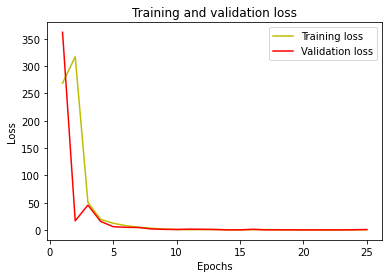

In [10]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.xlabel('Epochs')
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [11]:
history = history_gender

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

## Training and validation accuracy

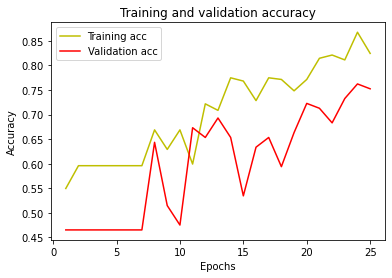

In [13]:
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Testing the model

In [15]:
print ("Accuracy = ", metrics.accuracy_score(gender_y, prediction))

Accuracy =  0.7524752475247525


<AxesSubplot:>

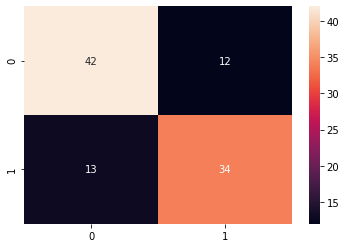

In [16]:
cm=confusion_matrix(gender_y, prediction)  
sns.heatmap(cm, annot=True)

### Function to get Face-Box

In [10]:

def getFaceBox(net, frame,conf_threshold = 0.75):
    frameOpencvDnn = frame.copy()
    frameHeight = frameOpencvDnn.shape[0]
    frameWidth = frameOpencvDnn.shape[1]
    blob = cv2.dnn.blobFromImage(frameOpencvDnn,1.0,(300,300),
                                 [104, 117, 123], True, False)

    net.setInput(blob)
    detections = net.forward()
    bboxes = []

    for i in range(detections.shape[2]):
        confidence = detections[0,0,i,2]
        if confidence > conf_threshold:
            x1 = int(detections[0,0,i,3]* frameWidth)
            y1 = int(detections[0,0,i,4]* frameHeight)
            x2 = int(detections[0,0,i,5]* frameWidth)
            y2 = int(detections[0,0,i,6]* frameHeight)
            bboxes.append([x1,y1,x2,y2])
            cv2.rectangle(frameOpencvDnn,(x1,y1),(x2,y2),(0,255,0),
                          int(round(frameHeight/150)),8)

    return frameOpencvDnn , bboxes

## Model Files

In [11]:

faceProto = "opencv_face_detector.pbtxt"
faceModel = "opencv_face_detector_uint8.pb"

ageProto = "age_deploy.prototxt"
ageModel = "age_net.caffemodel"

genderProto = "gender_deploy.prototxt"
genderModel = "gender_net.caffemodel"

MODEL_MEAN_VALUES = (78.4263377603, 87.7689143744, 114.895847746)
ageList = ['(0-2)', '(4-6)', '(8-12)', '(15-20)', '(25-32)', '(38-43)', '(48-53)', '(60-100)']
genderList = ['Male', 'Female']

## loading the network

In [12]:
ageNet = cv2.dnn.readNet(ageModel,ageProto)
genderNet = cv2.dnn.readNet(genderModel, genderProto)
faceNet = cv2.dnn.readNet(faceModel, faceProto)

cap = cv2.VideoCapture(0)
padding = 20

In [13]:
while cv2.waitKey(1) < 0:
    
    t = time.time()
    hasFrame , frame = cap.read()

    if not hasFrame:
        cv2.waitKey()
        break
    
    small_frame = cv2.resize(frame,(0,0),fx = 0.9,fy = 0.9)

    frameFace ,bboxes = getFaceBox(faceNet,small_frame)
    if not bboxes:
        print("No face Detected, Checking next frame")
        continue
    for bbox in bboxes:
        face = small_frame[max(0,bbox[1]-padding):min(bbox[3]+padding,frame.shape[0]-1),
                max(0,bbox[0]-padding):min(bbox[2]+padding, frame.shape[1]-1)]
        blob = cv2.dnn.blobFromImage(face, 1.0, (227, 227), MODEL_MEAN_VALUES, swapRB=False)
        genderNet.setInput(blob)
        genderPreds = genderNet.forward()
        gender = genderList[genderPreds[0].argmax()]
        print("Gender : {}, conf = {:.3f}".format(gender, genderPreds[0].max()))

        ageNet.setInput(blob)
        agePreds = ageNet.forward()
        age = ageList[agePreds[0].argmax()]
        print("Age Output : {}".format(agePreds))
        print("Age : {}, conf = {:.3f}".format(age, agePreds[0].max()))

        label = "{},{}".format(gender, age)
        cv2.putText(frameFace, label, (bbox[0], bbox[1]-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 255), 2, cv2.LINE_AA)
        cv2.imshow("Age Gender Demo", frameFace)
       
    print("time : {:.3f}".format(time.time() - t))

Gender : Male, conf = 0.990
Age Output : [[8.5635720e-06 7.7177444e-04 4.2393029e-01 5.7068688e-01 3.9329426e-03
  6.5792294e-04 2.8333816e-06 8.7950903e-06]]
Age : (15-20), conf = 0.571
time : 0.398
Gender : Male, conf = 0.995
Age Output : [[1.8533543e-05 3.6886027e-03 7.6032621e-01 2.3260944e-01 2.9333793e-03
  4.0571782e-04 2.7186263e-06 1.5480913e-05]]
Age : (8-12), conf = 0.760
time : 0.171
Gender : Male, conf = 0.999
Age Output : [[1.7979750e-05 6.4426876e-04 1.0784024e-01 8.5031843e-01 4.0231403e-02
  8.9544291e-04 1.2913895e-05 3.9337432e-05]]
Age : (15-20), conf = 0.850
time : 0.188
Gender : Male, conf = 0.999
Age Output : [[8.0151922e-06 2.9431834e-04 3.4352869e-02 9.0101051e-01 6.3651010e-02
  6.4477453e-04 9.6778067e-06 2.8763026e-05]]
Age : (15-20), conf = 0.901
time : 0.164
Gender : Male, conf = 0.987
Age Output : [[4.7832723e-06 2.8577275e-05 9.7753918e-03 9.6283448e-01 2.4573794e-02
  2.7417289e-03 1.6207901e-05 2.5009045e-05]]
Age : (15-20), conf = 0.963
time : 0.176
G

Gender : Male, conf = 0.990
Age Output : [[8.6978207e-06 1.7652648e-03 4.4894215e-01 5.3812212e-01 1.0296806e-02
  8.2570658e-04 6.6179186e-06 3.2660766e-05]]
Age : (15-20), conf = 0.538
time : 0.127
Gender : Male, conf = 0.959
Age Output : [[3.7598115e-06 8.4711623e-04 1.2292207e-01 8.6581224e-01 9.6711470e-03
  7.2159438e-04 3.7057632e-06 1.8422235e-05]]
Age : (15-20), conf = 0.866
time : 0.139
Gender : Male, conf = 0.941
Age Output : [[2.9161654e-06 1.0120308e-04 3.0407028e-02 9.5735687e-01 1.1271819e-02
  8.4087020e-04 4.4475960e-06 1.4747060e-05]]
Age : (15-20), conf = 0.957
time : 0.124
Gender : Male, conf = 0.991
Age Output : [[5.2303699e-06 3.5228583e-04 1.2481688e-01 8.6352205e-01 1.0396727e-02
  8.8222820e-04 5.5279393e-06 1.9088742e-05]]
Age : (15-20), conf = 0.864
time : 0.134
Gender : Male, conf = 0.937
Age Output : [[9.6015822e-07 4.1654639e-05 1.1084329e-02 9.7418267e-01 1.3847154e-02
  8.2883053e-04 2.2697800e-06 1.2077719e-05]]
Age : (15-20), conf = 0.974
time : 0.134


Gender : Female, conf = 0.995
Age Output : [[1.1560868e-06 4.3466798e-06 2.2573088e-04 7.0633399e-01 2.7185583e-01
  2.1419404e-02 5.5190631e-05 1.0440372e-04]]
Age : (15-20), conf = 0.706
time : 0.139
Gender : Female, conf = 0.996
Age Output : [[4.9905026e-07 4.6596147e-06 5.7600107e-04 6.4129472e-01 3.5475981e-01
  3.3101973e-03 2.3538019e-05 3.0584521e-05]]
Age : (15-20), conf = 0.641
time : 0.139
Gender : Female, conf = 0.996
Age Output : [[5.2046596e-07 2.7469864e-06 5.3791696e-04 3.3049917e-01 6.5949064e-01
  9.3794698e-03 4.7981426e-05 4.1625295e-05]]
Age : (25-32), conf = 0.659
time : 0.145
Gender : Female, conf = 0.992
Age Output : [[9.7596887e-07 4.4864773e-06 9.5058832e-04 6.9297504e-01 2.9288089e-01
  1.3068728e-02 5.3157935e-05 6.6174478e-05]]
Age : (15-20), conf = 0.693
time : 0.127
Gender : Female, conf = 0.998
Age Output : [[8.2705020e-07 4.2208349e-06 3.2924351e-04 3.9599952e-01 5.9699696e-01
  6.5964349e-03 2.4595003e-05 4.8106438e-05]]
Age : (25-32), conf = 0.597
tim

Gender : Female, conf = 0.999
Age Output : [[5.5809016e-07 1.2964631e-06 1.0438405e-04 5.7492137e-02 9.2411453e-01
  1.8209489e-02 3.2786123e-05 4.4695138e-05]]
Age : (25-32), conf = 0.924
time : 0.114
Gender : Female, conf = 0.996
Age Output : [[2.1397207e-06 6.0792299e-06 1.9113037e-03 2.8159165e-01 6.8349886e-01
  3.2755151e-02 1.6404166e-04 7.0770424e-05]]
Age : (25-32), conf = 0.683
time : 0.135
Gender : Female, conf = 0.998
Age Output : [[1.8036239e-06 6.3989783e-06 1.4656999e-03 6.6534948e-01 3.1447968e-01
  1.8558349e-02 1.0277839e-04 3.5801630e-05]]
Age : (15-20), conf = 0.665
time : 0.136
Gender : Female, conf = 0.998
Age Output : [[3.8866265e-06 1.3924200e-05 3.3409207e-04 1.6426714e-01 8.1507534e-01
  2.0117804e-02 9.5093317e-05 9.2647810e-05]]
Age : (25-32), conf = 0.815
time : 0.132
Gender : Female, conf = 0.997
Age Output : [[9.3441741e-07 8.8662409e-06 1.7704350e-03 6.1350131e-01 3.8247052e-01
  2.2127482e-03 1.4574489e-05 2.0660624e-05]]
Age : (15-20), conf = 0.614
tim

Gender : Female, conf = 0.816
Age Output : [[2.3908283e-06 4.4412231e-05 6.0733911e-03 9.8558217e-01 7.2390703e-03
  1.0437755e-03 4.1227586e-06 1.0679303e-05]]
Age : (15-20), conf = 0.986
time : 0.135
Gender : Female, conf = 0.659
Age Output : [[6.4661672e-06 1.5160961e-04 2.2526925e-02 9.6309209e-01 1.1540419e-02
  2.6561238e-03 6.6656958e-06 1.9734876e-05]]
Age : (15-20), conf = 0.963
time : 0.129
Gender : Female, conf = 0.785
Age Output : [[3.7908869e-06 5.7806141e-05 8.7290201e-03 9.8130715e-01 8.1078261e-03
  1.7717741e-03 4.7444287e-06 1.7772301e-05]]
Age : (15-20), conf = 0.981
time : 0.135
Gender : Female, conf = 0.759
Age Output : [[5.1972279e-06 5.6453406e-05 5.6447391e-03 9.7805059e-01 1.3498795e-02
  2.7066446e-03 7.0968827e-06 3.0422922e-05]]
Age : (15-20), conf = 0.978
time : 0.123
Gender : Male, conf = 0.718
Age Output : [[5.0783106e-06 9.7187076e-05 8.7716756e-03 9.8004740e-01 8.7483758e-03
  2.2996448e-03 7.0016545e-06 2.3425971e-05]]
Age : (15-20), conf = 0.980
time 

Gender : Female, conf = 0.899
Age Output : [[1.4421792e-07 1.1771760e-06 1.3814369e-04 1.0460132e-01 8.9453363e-01
  7.1460212e-04 3.0539418e-06 7.8963349e-06]]
Age : (25-32), conf = 0.895
time : 0.127
Gender : Female, conf = 0.916
Age Output : [[1.5450846e-07 1.2402943e-06 1.6581295e-04 1.1891801e-01 8.8015413e-01
  7.4992777e-04 3.1830934e-06 7.6347587e-06]]
Age : (25-32), conf = 0.880
time : 0.124
Gender : Female, conf = 0.974
Age Output : [[1.5416643e-07 1.5629288e-06 2.1529556e-04 1.6540433e-01 8.3336741e-01
  9.9884789e-04 4.3869054e-06 7.9979118e-06]]
Age : (25-32), conf = 0.833
time : 0.150
Gender : Female, conf = 0.940
Age Output : [[9.3638732e-08 1.0138825e-06 2.9332505e-04 2.5631770e-01 7.4287122e-01
  5.0920411e-04 2.3110360e-06 5.1318361e-06]]
Age : (25-32), conf = 0.743
time : 0.126
Gender : Female, conf = 0.863
Age Output : [[1.8366356e-07 3.9324759e-06 8.9565292e-04 5.7390684e-01 4.2447025e-01
  7.1228400e-04 3.9568004e-06 6.9151120e-06]]
Age : (15-20), conf = 0.574
tim

Gender : Female, conf = 0.999
Age Output : [[1.2180560e-06 3.7568027e-06 1.2507071e-04 3.3058733e-02 9.4753170e-01
  1.9185685e-02 5.1811377e-05 4.2017200e-05]]
Age : (25-32), conf = 0.948
time : 0.133
Gender : Female, conf = 0.999
Age Output : [[3.7709006e-07 2.0836383e-06 9.7571778e-05 5.6470172e-03 9.9199957e-01
  2.2028363e-03 3.0588984e-05 1.9900781e-05]]
Age : (25-32), conf = 0.992
time : 0.135
Gender : Female, conf = 0.999
Age Output : [[5.4267321e-07 4.3296081e-06 1.6048532e-04 5.0620721e-03 9.9356377e-01
  1.1543322e-03 3.4158897e-05 2.0355626e-05]]
Age : (25-32), conf = 0.994
Gender : Male, conf = 1.000
Age Output : [[2.4895260e-06 2.0180389e-05 2.3357844e-04 3.3169630e-04 9.8779863e-01
  9.1208480e-03 2.2415714e-03 2.5101786e-04]]
Age : (25-32), conf = 0.988
time : 0.164
Gender : Female, conf = 0.999
Age Output : [[2.0995519e-06 9.6056001e-06 2.7909057e-04 1.2590070e-02 9.8131979e-01
  5.6456379e-03 1.0622066e-04 4.7546291e-05]]
Age : (25-32), conf = 0.981
Gender : Male, con

Gender : Male, conf = 0.989
Age Output : [[1.8701571e-07 4.4712838e-06 2.5022300e-03 9.8999280e-01 7.4181757e-03
  7.8789904e-05 7.7063947e-07 2.4569010e-06]]
Age : (15-20), conf = 0.990
time : 0.140
Gender : Male, conf = 0.989
Age Output : [[1.2921096e-07 2.5368113e-06 8.9205062e-04 9.8513585e-01 1.3872463e-02
  9.4263640e-05 7.1498255e-07 1.8390001e-06]]
Age : (15-20), conf = 0.985
time : 0.134
Gender : Male, conf = 0.990
Age Output : [[7.8034577e-07 1.2273666e-05 1.4065088e-03 9.7531533e-01 2.2821153e-02
  4.3331241e-04 3.1634675e-06 7.4927807e-06]]
Age : (15-20), conf = 0.975
time : 0.154
Gender : Male, conf = 0.995
Age Output : [[8.6651107e-07 2.7201129e-05 7.9022422e-03 9.6474475e-01 2.7034750e-02
  2.8007140e-04 3.1489453e-06 7.1591685e-06]]
Age : (15-20), conf = 0.965
time : 0.149
Gender : Male, conf = 0.993
Age Output : [[1.98115885e-07 1.22256624e-05 5.74295409e-03 9.75831568e-01
  1.82936303e-02 1.15119175e-04 1.54747636e-06 2.77946106e-06]]
Age : (15-20), conf = 0.976
time 

Gender : Female, conf = 0.930
Age Output : [[5.6795155e-08 4.5155278e-07 1.4236518e-05 4.4898172e-03 9.9541783e-01
  6.4330743e-05 3.2753858e-06 9.9173894e-06]]
Age : (25-32), conf = 0.995
time : 0.112
Gender : Female, conf = 0.715
Age Output : [[6.8590843e-08 5.3027293e-07 1.2104991e-05 1.9706532e-03 9.9793744e-01
  6.2340601e-05 4.1584644e-06 1.2699660e-05]]
Age : (25-32), conf = 0.998
time : 0.122
Gender : Female, conf = 0.886
Age Output : [[7.5112972e-08 4.4213584e-07 1.4173852e-05 9.5021905e-04 9.9894911e-01
  6.6227411e-05 5.1156553e-06 1.4665776e-05]]
Age : (25-32), conf = 0.999
time : 0.116
Gender : Female, conf = 0.980
Age Output : [[2.7995173e-07 1.1987647e-06 8.3835133e-05 2.1231263e-03 9.9756843e-01
  1.6876830e-04 1.3235845e-05 4.1109728e-05]]
Age : (25-32), conf = 0.998
time : 0.120
Gender : Female, conf = 0.949
Age Output : [[1.5356976e-06 4.5752990e-06 1.0294387e-04 1.1218693e-02 9.8771489e-01
  7.6380133e-04 3.4392517e-05 1.5915686e-04]]
Age : (25-32), conf = 0.988
tim

Gender : Female, conf = 0.999
Age Output : [[2.8888959e-07 3.2562189e-06 4.9589158e-05 1.5918087e-03 9.9824500e-01
  9.7988042e-05 5.4875463e-06 6.7019082e-06]]
Age : (25-32), conf = 0.998
time : 0.117
Gender : Female, conf = 0.997
Age Output : [[8.7586479e-08 1.0591168e-06 2.4131703e-05 4.2925990e-04 9.9950004e-01
  4.0623672e-05 2.4569308e-06 2.2481049e-06]]
Age : (25-32), conf = 1.000
time : 0.130
Gender : Female, conf = 0.999
Age Output : [[1.4554350e-07 1.1648083e-06 1.0328875e-04 5.5665025e-03 9.9419975e-01
  1.1274528e-04 5.4635784e-06 1.1020746e-05]]
Age : (25-32), conf = 0.994
time : 0.117
Gender : Female, conf = 0.987
Age Output : [[6.1701257e-07 2.5709453e-06 3.1204363e-05 8.4478609e-02 9.1123807e-01
  4.1667824e-03 2.0200383e-05 6.1875151e-05]]
Age : (25-32), conf = 0.911
time : 0.115
Gender : Female, conf = 0.921
Age Output : [[5.1787201e-06 1.9202820e-05 2.8601656e-04 2.8278822e-01 7.0513165e-01
  1.1524000e-02 5.2354178e-05 1.9338881e-04]]
Age : (25-32), conf = 0.705
tim

Gender : Male, conf = 0.953
Age Output : [[3.7612176e-07 1.0606037e-05 1.0248395e-02 9.7912496e-01 1.0269992e-02
  3.3272864e-04 2.1461340e-06 1.0746297e-05]]
Age : (15-20), conf = 0.979
time : 0.146
Gender : Male, conf = 0.563
Age Output : [[1.6996395e-06 9.6894801e-06 9.6395513e-04 9.5879853e-01 3.8069401e-02
  2.1208217e-03 1.1271831e-05 2.4722052e-05]]
Age : (15-20), conf = 0.959
time : 0.150
Gender : Male, conf = 0.809
Age Output : [[2.4413196e-06 1.4686256e-05 9.6347486e-04 9.6469593e-01 3.2331500e-02
  1.9458419e-03 1.4232589e-05 3.1902950e-05]]
Age : (15-20), conf = 0.965
time : 0.142
Gender : Male, conf = 0.647
Age Output : [[3.5816763e-07 4.5051079e-06 2.2611881e-04 9.9039453e-01 9.0790922e-03
  2.8643582e-04 2.0010025e-06 6.9598764e-06]]
Age : (15-20), conf = 0.990
time : 0.130
Gender : Female, conf = 0.971
Age Output : [[4.2766786e-07 7.6447432e-06 3.3960596e-04 9.8523927e-01 1.4149650e-02
  2.4998243e-04 2.6681105e-06 1.0835962e-05]]
Age : (15-20), conf = 0.985
time : 0.15

Gender : Female, conf = 0.705
Age Output : [[1.2767393e-05 4.4315802e-05 3.1800808e-03 9.0606385e-01 8.2201190e-02
  8.3463099e-03 6.3446285e-05 8.7989727e-05]]
Age : (15-20), conf = 0.906
time : 0.139
Gender : Female, conf = 0.958
Age Output : [[2.5136987e-06 1.5446820e-05 6.7928265e-04 9.8011178e-01 1.5593479e-02
  3.5460512e-03 2.6274998e-05 2.5177780e-05]]
Age : (15-20), conf = 0.980
time : 0.124
Gender : Male, conf = 0.507
Age Output : [[2.3708403e-06 1.6269694e-05 5.7762931e-04 9.9184763e-01 6.1015119e-03
  1.4004197e-03 2.4763198e-05 2.9445555e-05]]
Age : (15-20), conf = 0.992
time : 0.124
Gender : Male, conf = 0.672
Age Output : [[2.4944438e-06 1.5584921e-05 5.3815561e-04 9.9327976e-01 5.0942372e-03
  1.0413885e-03 1.0447946e-05 1.7868013e-05]]
Age : (15-20), conf = 0.993
time : 0.120
Gender : Male, conf = 0.816
Age Output : [[2.8359188e-06 1.1197808e-05 4.2131290e-04 9.6774161e-01 2.8586982e-02
  3.1897575e-03 1.4941171e-05 3.1150350e-05]]
Age : (15-20), conf = 0.968
time : 0.

Gender : Female, conf = 0.787
Age Output : [[1.5842559e-05 1.2108196e-04 3.6778650e-03 9.2709541e-01 6.7041397e-02
  1.8939340e-03 5.6040641e-05 9.8321274e-05]]
Age : (15-20), conf = 0.927
time : 0.111
Gender : Female, conf = 0.965
Age Output : [[2.5663944e-06 4.0870407e-05 5.8524753e-04 9.9067491e-01 8.2812114e-03
  3.8732961e-04 1.2723348e-05 1.5172813e-05]]
Age : (15-20), conf = 0.991
time : 0.137
Gender : Female, conf = 0.988
Age Output : [[8.1580329e-06 7.4679236e-05 1.7185741e-03 7.9587191e-01 1.9856565e-01
  3.5666493e-03 8.2195656e-05 1.1227124e-04]]
Age : (15-20), conf = 0.796
time : 0.111
Gender : Female, conf = 0.990
Age Output : [[1.3361667e-06 2.4856397e-05 5.7872973e-04 8.6006725e-01 1.3784048e-01
  1.4327249e-03 2.6076077e-05 2.8646886e-05]]
Age : (15-20), conf = 0.860
time : 0.124
Gender : Female, conf = 0.539
Age Output : [[3.45671970e-06 3.47884168e-04 6.00876706e-03 9.15786922e-01
  7.74349570e-02 3.85067658e-04 1.29062355e-05 2.01295261e-05]]
Age : (15-20), conf = 0

Gender : Female, conf = 0.988
Age Output : [[2.5691948e-05 8.6439693e-05 1.1889806e-02 9.4297037e-02 8.8713223e-01
  5.1875571e-03 1.0148309e-03 3.6641065e-04]]
Age : (25-32), conf = 0.887
time : 0.179
Gender : Female, conf = 0.995
Age Output : [[4.0227078e-05 1.2004730e-04 8.9324955e-03 7.8834251e-02 9.0288162e-01
  7.1631451e-03 1.3424989e-03 6.8574311e-04]]
Age : (25-32), conf = 0.903
time : 0.210
Gender : Female, conf = 0.793
Age Output : [[3.7192519e-06 1.0807843e-05 3.5617183e-04 4.2896150e-03 9.8808146e-01
  6.7420565e-03 2.2735787e-04 2.8880994e-04]]
Age : (25-32), conf = 0.988
time : 0.203
Gender : Female, conf = 0.999
Age Output : [[8.2177905e-08 5.8582259e-07 9.9246290e-06 1.2498860e-02 9.8654294e-01
  9.2984317e-04 4.7467588e-06 1.3143570e-05]]
Age : (25-32), conf = 0.987
Gender : Male, conf = 1.000
Age Output : [[3.83792474e-04 1.28135355e-02 4.34639119e-03 1.22905597e-01
  7.10003078e-01 1.08755723e-01 3.59924175e-02 4.79956623e-03]]
Age : (25-32), conf = 0.710
time : 0.3

Gender : Male, conf = 1.000
Age Output : [[4.4761814e-06 8.2681967e-05 1.2417219e-04 4.0721386e-03 9.7711438e-01
  1.7892992e-02 5.4948340e-04 1.5966425e-04]]
Age : (25-32), conf = 0.977
time : 0.223
Gender : Female, conf = 0.988
Age Output : [[5.0114054e-06 3.1632844e-05 3.5282616e-03 2.7525496e-02 9.6367204e-01
  4.6814904e-03 4.7591547e-04 8.0118814e-05]]
Age : (25-32), conf = 0.964
Gender : Male, conf = 0.998
Age Output : [[3.8010471e-06 5.2824213e-05 2.9643014e-04 9.9180511e-04 4.1535097e-01
  5.8014888e-01 2.8652865e-03 2.9006650e-04]]
Age : (38-43), conf = 0.580
time : 0.213
Gender : Female, conf = 0.982
Age Output : [[2.81543671e-05 5.95604943e-04 2.61995465e-01 2.30540067e-01
  2.84903198e-01 1.07667886e-01 2.94648986e-02 8.48047137e-02]]
Age : (25-32), conf = 0.285
Gender : Female, conf = 0.989
Age Output : [[9.5921292e-05 1.5956625e-04 9.1448153e-04 1.0839236e-02 6.6599315e-01
  3.1286234e-01 7.2897705e-03 1.8455302e-03]]
Age : (25-32), conf = 0.666
time : 0.219
Gender : Fem

time : 0.184
Gender : Female, conf = 0.968
Age Output : [[2.1592141e-05 7.9746569e-05 1.7003046e-03 9.8003376e-01 1.2067733e-02
  5.9448746e-03 6.7321722e-05 8.4721949e-05]]
Age : (15-20), conf = 0.980
time : 0.179
Gender : Female, conf = 0.969
Age Output : [[4.6948422e-05 1.6793660e-04 2.4667662e-03 9.7578400e-01 1.3080626e-02
  8.2003949e-03 1.2273074e-04 1.3061092e-04]]
Age : (15-20), conf = 0.976
time : 0.255
Gender : Female, conf = 0.956
Age Output : [[9.2153477e-06 4.7909303e-05 1.1567480e-03 9.9200362e-01 4.5718127e-03
  2.1552106e-03 2.7657024e-05 2.7797409e-05]]
Age : (15-20), conf = 0.992
time : 0.196
Gender : Female, conf = 0.898
Age Output : [[1.3718595e-05 8.0380232e-05 1.6550721e-03 9.9131846e-01 4.3349597e-03
  2.5280104e-03 3.0970750e-05 3.8456012e-05]]
Age : (15-20), conf = 0.991
time : 0.153
Gender : Female, conf = 0.895
Age Output : [[5.8682523e-05 2.0340928e-04 2.6163731e-03 9.7238433e-01 1.5525192e-02
  8.8905664e-03 1.3967961e-04 1.8174137e-04]]
Age : (15-20), con

Gender : Female, conf = 0.995
Age Output : [[2.2947179e-05 6.6285036e-05 1.3727174e-03 8.7985933e-01 9.9649124e-02
  1.8718420e-02 9.4391333e-05 2.1683367e-04]]
Age : (15-20), conf = 0.880
time : 0.138
Gender : Female, conf = 0.991
Age Output : [[2.7078642e-05 7.9596823e-05 1.9242149e-03 7.5754207e-01 2.1612337e-01
  2.3975534e-02 9.0384725e-05 2.3770661e-04]]
Age : (15-20), conf = 0.758
time : 0.134
Gender : Female, conf = 0.997
Age Output : [[1.1432904e-05 1.1856394e-04 4.9470430e-03 8.8396084e-01 1.1005168e-01
  7.4421550e-04 1.2430811e-04 4.1960415e-05]]
Age : (15-20), conf = 0.884
time : 0.150
Gender : Female, conf = 0.999
Age Output : [[3.8844073e-06 9.5743133e-05 1.9659114e-03 2.9597467e-01 7.0157963e-01
  3.5372755e-04 8.5693837e-06 1.7960459e-05]]
Age : (25-32), conf = 0.702
time : 0.155
No face Detected, Checking next frame
No face Detected, Checking next frame
No face Detected, Checking next frame
No face Detected, Checking next frame
No face Detected, Checking next frame
No

Gender : Female, conf = 0.996
Age Output : [[8.9732174e-07 1.2239177e-05 3.5038753e-04 9.9568790e-01 3.5601922e-03
  3.6974577e-04 8.1596063e-06 1.0487709e-05]]
Age : (15-20), conf = 0.996
time : 0.149
Gender : Female, conf = 0.998
Age Output : [[2.5506899e-06 3.1490403e-05 5.7816185e-04 9.8921889e-01 7.9556117e-03
  1.9843162e-03 1.4217770e-04 8.6714768e-05]]
Age : (15-20), conf = 0.989
time : 0.164
Gender : Female, conf = 0.998
Age Output : [[5.1904808e-06 4.8992999e-05 5.2635232e-04 9.8719263e-01 9.9622374e-03
  2.0477823e-03 1.1578536e-04 1.0111708e-04]]
Age : (15-20), conf = 0.987
time : 0.144
Gender : Female, conf = 0.997
Age Output : [[1.3225525e-06 1.6790878e-05 4.3158318e-04 9.9178177e-01 6.6869520e-03
  1.0208581e-03 4.0481558e-05 2.0260179e-05]]
Age : (15-20), conf = 0.992
time : 0.155
Gender : Female, conf = 0.997
Age Output : [[1.0101945e-06 1.4166790e-05 3.1925406e-04 9.9490404e-01 4.3519940e-03
  3.8846079e-04 1.2715400e-05 8.3648492e-06]]
Age : (15-20), conf = 0.995
tim

Gender : Male, conf = 1.000
Age Output : [[1.8034053e-06 4.0348950e-06 1.8653867e-04 3.1376726e-04 9.9752647e-01
  6.2819017e-04 1.1937035e-03 1.4559255e-04]]
Age : (25-32), conf = 0.998
time : 0.220
Gender : Male, conf = 1.000
Age Output : [[1.38130270e-06 6.37589255e-06 1.11183814e-04 7.13560730e-04
  9.97407019e-01 8.85034562e-04 7.36791117e-04 1.38543197e-04]]
Age : (25-32), conf = 0.997
Gender : Female, conf = 0.985
Age Output : [[1.13069746e-06 5.80471851e-06 6.23465632e-04 1.82836071e-01
  8.09239924e-01 7.13356584e-03 1.18626434e-04 4.13290472e-05]]
Age : (25-32), conf = 0.809
time : 0.202
Gender : Male, conf = 1.000
Age Output : [[4.4628341e-05 1.4482089e-04 5.7995296e-04 1.4553276e-03 9.9066800e-01
  2.5924975e-03 4.0651113e-03 4.4974822e-04]]
Age : (25-32), conf = 0.991
Gender : Female, conf = 0.997
Age Output : [[2.7096073e-07 1.3316084e-06 6.3608495e-05 5.0874159e-02 9.3359721e-01
  1.5426656e-02 2.0287034e-05 1.6583268e-05]]
Age : (25-32), conf = 0.934
time : 0.208
Gender

Gender : Male, conf = 0.994
Age Output : [[0.37972108 0.06604708 0.01034204 0.05510996 0.09535394 0.0374779
  0.07629542 0.27965257]]
Age : (0-2), conf = 0.380
time : 0.145
Gender : Female, conf = 0.669
Age Output : [[0.00608302 0.0013951  0.00128137 0.01619963 0.43975323 0.2254709
  0.02641709 0.2833997 ]]
Age : (25-32), conf = 0.440
time : 0.150
No face Detected, Checking next frame
No face Detected, Checking next frame
No face Detected, Checking next frame
No face Detected, Checking next frame
No face Detected, Checking next frame
No face Detected, Checking next frame
No face Detected, Checking next frame
No face Detected, Checking next frame
No face Detected, Checking next frame
No face Detected, Checking next frame
No face Detected, Checking next frame
No face Detected, Checking next frame
Gender : Female, conf = 0.645
Age Output : [[0.0071164  0.00285213 0.00229542 0.06603634 0.45456845 0.2113681
  0.02588147 0.22988166]]
Age : (25-32), conf = 0.455
time : 0.133
Gender : Female, 

Gender : Female, conf = 0.998
Age Output : [[5.8446867e-06 1.0372620e-04 1.7046996e-03 3.1908506e-01 6.7791969e-01
  7.8215590e-04 3.0653790e-04 9.2372815e-05]]
Age : (25-32), conf = 0.678
time : 0.171
Gender : Female, conf = 0.966
Age Output : [[1.2739051e-06 1.0674662e-05 5.1265536e-04 2.0508873e-01 7.9334515e-01
  9.6747157e-04 4.1578358e-05 3.2383548e-05]]
Age : (25-32), conf = 0.793
time : 0.150
Gender : Male, conf = 0.825
Age Output : [[0.02875242 0.00570027 0.00474923 0.01558497 0.28367457 0.22799209
  0.1472652  0.2862813 ]]
Age : (60-100), conf = 0.286
time : 0.152
Gender : Female, conf = 0.913
Age Output : [[4.9196102e-04 5.1078247e-04 6.9964689e-04 8.1621319e-02 5.4671574e-01
  2.0247540e-01 3.3420507e-02 1.3406472e-01]]
Age : (25-32), conf = 0.547
time : 0.152
Gender : Female, conf = 0.982
Age Output : [[0.00054188 0.00058755 0.00099917 0.19641265 0.33763146 0.27413553
  0.02115832 0.16853346]]
Age : (25-32), conf = 0.338
time : 0.140
Gender : Female, conf = 0.982
Age Outpu

time : 0.149
Gender : Female, conf = 0.995
Age Output : [[2.6850257e-05 1.1979462e-04 9.7834959e-04 8.1371331e-01 1.7513144e-01
  9.7377216e-03 1.2896683e-04 1.6341551e-04]]
Age : (15-20), conf = 0.814
time : 0.142
Gender : Female, conf = 0.997
Age Output : [[6.8690347e-06 2.5192756e-05 2.9678279e-04 9.8997682e-01 6.3841031e-03
  3.2389767e-03 3.3283879e-05 3.8013819e-05]]
Age : (15-20), conf = 0.990
time : 0.149
Gender : Female, conf = 0.994
Age Output : [[2.15352975e-05 7.00997043e-05 5.82591456e-04 9.77388382e-01
  1.32381637e-02 8.50543473e-03 9.03568434e-05 1.03403036e-04]]
Age : (15-20), conf = 0.977
time : 0.138
Gender : Female, conf = 0.995
Age Output : [[8.4691437e-06 3.1499203e-05 3.5079219e-04 9.8980027e-01 6.1025843e-03
  3.6304323e-03 3.6560701e-05 3.9280476e-05]]
Age : (15-20), conf = 0.990
time : 0.147
Gender : Female, conf = 0.993
Age Output : [[6.6181269e-06 2.5284900e-05 3.2485180e-04 9.9020839e-01 5.9496709e-03
  3.4183857e-03 3.4459586e-05 3.2388863e-05]]
Age : (15-

time : 0.139
Gender : Female, conf = 0.999
Age Output : [[7.1678414e-06 2.6773860e-05 2.7139459e-04 9.7280425e-01 2.0529170e-02
  6.2640090e-03 4.0802341e-05 5.6483579e-05]]
Age : (15-20), conf = 0.973
time : 0.149
Gender : Female, conf = 0.999
Age Output : [[3.8671187e-06 1.6291366e-05 1.8043988e-04 9.8360056e-01 1.2393660e-02
  3.7486372e-03 2.3593942e-05 3.2988868e-05]]
Age : (15-20), conf = 0.984
time : 0.210
Gender : Female, conf = 0.999
Age Output : [[2.2798040e-06 1.0696385e-05 1.4145355e-04 9.8191756e-01 1.4745839e-02
  3.1477008e-03 1.3721234e-05 2.0884845e-05]]
Age : (15-20), conf = 0.982
time : 0.149
Gender : Female, conf = 0.999
Age Output : [[3.6784099e-06 1.3778780e-05 1.6798657e-04 9.6612519e-01 2.6315065e-02
  7.3002656e-03 3.1217292e-05 4.2828022e-05]]
Age : (15-20), conf = 0.966
time : 0.152
Gender : Female, conf = 0.999
Age Output : [[1.8424234e-06 9.4348234e-06 1.2341015e-04 9.8326439e-01 1.3883000e-02
  2.6859064e-03 1.4308368e-05 1.7683849e-05]]
Age : (15-20), con

Gender : Female, conf = 0.957
Age Output : [[6.1031184e-05 1.5221689e-04 1.3075565e-03 4.9345443e-01 4.5090181e-01
  5.3150300e-02 3.6035321e-04 6.1241031e-04]]
Age : (15-20), conf = 0.493
time : 0.169
Gender : Female, conf = 0.995
Age Output : [[5.1094958e-05 1.7689269e-04 2.2028312e-03 6.5995544e-01 3.2060790e-01
  1.6466025e-02 2.1421621e-04 3.2543862e-04]]
Age : (15-20), conf = 0.660
time : 0.136
Gender : Female, conf = 0.997
Age Output : [[1.6120455e-04 2.7147456e-04 2.0554520e-03 8.5476726e-01 8.0696903e-02
  6.0121112e-02 1.1497368e-03 7.7699398e-04]]
Age : (15-20), conf = 0.855
time : 0.149
Gender : Female, conf = 0.999
Age Output : [[1.3972382e-04 2.6380084e-04 1.4349535e-03 2.9558092e-01 5.5526549e-01
  1.4297068e-01 2.5806399e-03 1.7638584e-03]]
Age : (25-32), conf = 0.555
time : 0.151
Gender : Female, conf = 0.999
Age Output : [[7.7768338e-05 2.4730922e-04 1.4376027e-03 5.2527034e-01 4.2911321e-01
  4.2303819e-02 7.3110987e-04 8.1884913e-04]]
Age : (15-20), conf = 0.525
tim

time : 0.166
Gender : Male, conf = 0.562
Age Output : [[1.7017803e-04 8.6175920e-03 2.8003801e-02 1.4740819e-04 9.5939922e-01
  2.8121304e-03 7.2069425e-04 1.2899665e-04]]
Age : (25-32), conf = 0.959
Gender : Male, conf = 0.617
Age Output : [[0.00544673 0.05165663 0.04838142 0.07693343 0.60584545 0.13235067
  0.06697319 0.01241244]]
Age : (25-32), conf = 0.606
time : 0.167
Gender : Male, conf = 1.000
Age Output : [[1.4306456e-04 4.0634386e-02 9.1027647e-02 6.2247447e-04 8.6071670e-01
  6.1950535e-03 5.2969321e-04 1.3097953e-04]]
Age : (25-32), conf = 0.861
Gender : Male, conf = 0.994
Age Output : [[3.5931709e-05 1.2833362e-04 8.2148198e-04 6.2339841e-03 9.3491584e-01
  4.4971224e-02 1.1890939e-02 1.0022646e-03]]
Age : (25-32), conf = 0.935
time : 0.166
Gender : Male, conf = 1.000
Age Output : [[2.8977762e-03 4.6425459e-01 1.9881232e-01 7.6529238e-04 3.2694361e-01
  5.0963569e-03 1.0470616e-03 1.8301920e-04]]
Age : (4-6), conf = 0.464
time : 0.132
Gender : Male, conf = 1.000
Age Output 

Age Output : [[3.0344117e-06 9.7578923e-05 1.4868047e-03 1.6362284e-03 9.8170346e-01
  1.4821781e-02 2.1284922e-04 3.8231163e-05]]
Age : (25-32), conf = 0.982
time : 0.178
Gender : Male, conf = 1.000
Age Output : [[5.8498649e-06 3.0152814e-04 4.8605553e-03 8.7867054e-04 9.9000931e-01
  3.6657706e-03 2.4798440e-04 3.0481040e-05]]
Age : (25-32), conf = 0.990
time : 0.170
Gender : Male, conf = 1.000
Age Output : [[5.2743267e-06 3.1238599e-04 5.4558236e-03 7.8832963e-04 9.9068892e-01
  2.4333717e-03 2.7578537e-04 4.0131337e-05]]
Age : (25-32), conf = 0.991
time : 0.347
Gender : Male, conf = 1.000
Age Output : [[3.5573439e-06 1.0642821e-04 6.9946691e-04 1.3081518e-03 9.9386674e-01
  3.8065754e-03 1.8263643e-04 2.6385145e-05]]
Age : (25-32), conf = 0.994
time : 0.186
Gender : Male, conf = 1.000
Age Output : [[3.0435683e-06 5.4674176e-05 2.7950961e-04 1.1427409e-03 9.9284112e-01
  5.4127574e-03 2.3467567e-04 3.1485015e-05]]
Age : (25-32), conf = 0.993
time : 0.209
Gender : Male, conf = 1.000


time : 0.165
Gender : Male, conf = 1.000
Age Output : [[1.1740485e-07 1.5232307e-06 4.1115411e-05 2.9535021e-04 9.9914026e-01
  4.7099550e-04 2.7082793e-05 2.3537685e-05]]
Age : (25-32), conf = 0.999
Gender : Male, conf = 0.997
Age Output : [[1.6669424e-04 3.8259407e-04 4.5437690e-02 8.1791444e-04 9.3711257e-01
  1.5269700e-02 7.1025809e-04 1.0268167e-04]]
Age : (25-32), conf = 0.937
time : 0.203
Gender : Male, conf = 1.000
Age Output : [[5.8553201e-08 4.9830589e-07 8.9287914e-06 7.0318449e-05 9.9968135e-01
  2.1157417e-04 1.1924083e-05 1.5417538e-05]]
Age : (25-32), conf = 1.000
Gender : Male, conf = 1.000
Age Output : [[6.7325134e-05 9.9773664e-05 6.0985856e-02 6.0209108e-04 9.0843147e-01
  2.8541794e-02 1.1333928e-03 1.3834155e-04]]
Age : (25-32), conf = 0.908
time : 0.188
Gender : Male, conf = 1.000
Age Output : [[2.5798110e-07 1.1990871e-06 1.6004304e-05 1.9437193e-04 9.9927086e-01
  4.1737338e-04 3.2972792e-05 6.6955487e-05]]
Age : (25-32), conf = 0.999
Gender : Male, conf = 0.99

time : 0.179
Gender : Male, conf = 1.000
Age Output : [[5.4084779e-07 5.0562530e-06 9.2940158e-05 5.7846570e-04 9.9598569e-01
  9.0346741e-04 2.1993089e-03 2.3466043e-04]]
Age : (25-32), conf = 0.996
Gender : Male, conf = 1.000
Age Output : [[1.3964574e-06 9.9214969e-07 3.0411624e-03 1.0831878e-04 9.3347698e-01
  6.2828451e-02 4.4179670e-04 1.0089759e-04]]
Age : (25-32), conf = 0.933
time : 0.191
Gender : Male, conf = 1.000
Age Output : [[2.8852844e-07 3.9880788e-06 8.2484585e-05 4.2188077e-04 9.9707222e-01
  8.3335827e-04 1.4845037e-03 1.0134673e-04]]
Age : (25-32), conf = 0.997
Gender : Male, conf = 0.999
Age Output : [[1.0446930e-05 6.3765110e-05 4.9507773e-01 8.2296395e-04 4.8195869e-01
  2.1416759e-02 5.5061904e-04 9.9087374e-05]]
Age : (8-12), conf = 0.495
time : 0.240
Gender : Male, conf = 1.000
Age Output : [[4.3929967e-07 3.0652550e-06 6.9755362e-05 2.4935632e-04 9.9705791e-01
  1.1386154e-03 1.3794949e-03 1.0139284e-04]]
Age : (25-32), conf = 0.997
Gender : Male, conf = 1.000

Gender : Male, conf = 1.000
Age Output : [[5.0246940e-06 7.2976894e-05 8.8817283e-04 7.7907229e-03 9.6084815e-01
  2.9172281e-02 1.1293843e-03 9.3394963e-05]]
Age : (25-32), conf = 0.961
Gender : Male, conf = 1.000
Age Output : [[6.5361019e-07 2.4493676e-05 1.8555844e-01 1.3752168e-03 7.8358549e-01
  2.8839476e-02 5.2977412e-04 8.6436405e-05]]
Age : (25-32), conf = 0.784
time : 0.223
Gender : Male, conf = 1.000
Age Output : [[9.0957947e-06 1.3106172e-04 8.2615938e-04 4.1458826e-03 9.8211837e-01
  1.1412597e-02 1.2579497e-03 9.8825723e-05]]
Age : (25-32), conf = 0.982
Gender : Male, conf = 0.999
Age Output : [[2.4363663e-07 1.4208294e-06 2.1200746e-02 1.1895427e-03 9.4667697e-01
  3.0806391e-02 9.7916920e-05 2.6612988e-05]]
Age : (25-32), conf = 0.947
time : 0.230
Gender : Male, conf = 1.000
Age Output : [[1.3133346e-05 1.7090220e-04 5.2244758e-04 4.7572027e-03 9.8734587e-01
  5.7377466e-03 1.3598485e-03 9.2876828e-05]]
Age : (25-32), conf = 0.987
Gender : Male, conf = 0.980
Age Output 

Gender : Male, conf = 1.000
Age Output : [[1.8039919e-06 1.6929336e-05 1.5101263e-04 2.1603841e-03 9.9313158e-01
  4.1324045e-03 3.5038518e-04 5.5432291e-05]]
Age : (25-32), conf = 0.993
Gender : Male, conf = 1.000
Age Output : [[1.37447444e-07 1.24366725e-05 5.21780625e-02 5.50123956e-03
  6.98262930e-01 2.43069157e-01 7.92970241e-04 1.83119657e-04]]
Age : (25-32), conf = 0.698
time : 0.210
Gender : Male, conf = 1.000
Age Output : [[1.0301773e-07 1.0251952e-06 1.4935991e-03 1.6797213e-04 7.6896544e-03
  9.8991454e-01 5.7094812e-04 1.6219361e-04]]
Age : (38-43), conf = 0.990
Gender : Male, conf = 1.000
Age Output : [[9.5974783e-06 7.2235322e-05 8.4279542e-04 1.9360198e-02 9.5678014e-01
  2.1551700e-02 1.1908780e-03 1.9252430e-04]]
Age : (25-32), conf = 0.957
time : 0.194
Gender : Male, conf = 1.000
Age Output : [[3.26251495e-07 1.40336306e-05 1.12293944e-01 6.48077868e-04
  6.27319157e-01 2.59650052e-01 5.19382811e-05 2.24735450e-05]]
Age : (25-32), conf = 0.627
Gender : Male, conf = 1

time : 0.172
Gender : Male, conf = 1.000
Age Output : [[5.9831607e-05 1.5311489e-04 6.6566798e-03 2.5158260e-02 9.4957662e-01
  1.6893180e-02 1.2092931e-03 2.9308433e-04]]
Age : (25-32), conf = 0.950
Gender : Male, conf = 1.000
Age Output : [[4.9924867e-05 9.7859465e-04 7.2839975e-01 7.1620138e-04 2.6670757e-01
  2.2569248e-03 8.4520219e-04 4.5782621e-05]]
Age : (8-12), conf = 0.728
time : 0.189
Gender : Male, conf = 1.000
Age Output : [[1.8113967e-04 3.5585123e-04 9.7198356e-03 5.9486717e-02 8.9675611e-01
  3.1029152e-02 2.0570385e-03 4.1428322e-04]]
Age : (25-32), conf = 0.897
Gender : Male, conf = 0.970
Age Output : [[3.3174141e-04 4.3205163e-03 8.5505366e-01 3.9428324e-03 1.3491179e-01
  9.8427467e-04 4.1260812e-04 4.2549524e-05]]
Age : (8-12), conf = 0.855
time : 0.204
Gender : Male, conf = 0.998
Age Output : [[5.9979980e-06 1.4505845e-04 1.1458691e-01 5.4141640e-04 8.8259476e-01
  2.0429273e-03 6.9692258e-05 1.3277288e-05]]
Age : (25-32), conf = 0.883
Gender : Male, conf = 1.000


time : 0.164
Gender : Male, conf = 1.000
Age Output : [[1.9393294e-08 2.1440076e-07 1.7857392e-04 2.4389459e-05 9.9653494e-01
  3.2478615e-03 1.0657861e-05 3.3499882e-06]]
Age : (25-32), conf = 0.997
Gender : Male, conf = 1.000
Age Output : [[2.1083008e-04 2.4657114e-04 5.5863932e-03 5.2849170e-02 8.9872795e-01
  3.8336072e-02 3.3274998e-03 7.1552076e-04]]
Age : (25-32), conf = 0.899
time : 0.184
Gender : Male, conf = 1.000
Age Output : [[4.18998679e-04 6.34331198e-04 1.45425815e-02 5.72592728e-02
  8.91762972e-01 2.97936425e-02 4.68248688e-03 9.05687280e-04]]
Age : (25-32), conf = 0.892
Gender : Male, conf = 1.000
Age Output : [[8.1090144e-07 2.8338909e-05 3.6148984e-02 1.4764953e-03 9.4987541e-01
  1.2327066e-02 5.3987918e-05 8.8842193e-05]]
Age : (25-32), conf = 0.950
time : 0.200
Gender : Male, conf = 1.000
Age Output : [[7.9343183e-05 2.8409687e-04 9.2469761e-03 3.5781521e-02 9.4445300e-01
  8.5466728e-03 1.3413996e-03 2.6701592e-04]]
Age : (25-32), conf = 0.944
Gender : Male, con

Age Output : [[1.6639600e-08 9.5608108e-08 3.4578914e-06 2.5034411e-05 9.9985456e-01
  1.0381721e-04 5.1286934e-06 7.8632793e-06]]
Age : (25-32), conf = 1.000
time : 0.471
Gender : Male, conf = 1.000
Age Output : [[1.0536816e-07 1.5524304e-07 3.3553100e-05 8.2046849e-05 1.7556390e-01
  8.2387620e-01 2.8137679e-04 1.6267260e-04]]
Age : (38-43), conf = 0.824
Gender : Male, conf = 1.000
Age Output : [[3.3314489e-08 2.2759244e-07 6.8733489e-06 6.1453480e-05 9.9984002e-01
  6.4433712e-05 1.1816433e-05 1.5167897e-05]]
Age : (25-32), conf = 1.000
time : 0.388
Gender : Male, conf = 0.802
Age Output : [[8.6574509e-08 4.2124170e-06 2.1097028e-05 2.1347126e-04 9.9960715e-01
  8.3037492e-05 6.2775100e-05 8.0882846e-06]]
Age : (25-32), conf = 1.000
Gender : Male, conf = 1.000
Age Output : [[9.6253871e-07 4.0433417e-05 1.0833674e-01 1.2464862e-03 7.7598011e-01
  1.1429515e-01 5.9807066e-05 4.0334286e-05]]
Age : (25-32), conf = 0.776
time : 0.303
Gender : Male, conf = 1.000
Age Output : [[3.9339179e-

time : 0.174
Gender : Male, conf = 1.000
Age Output : [[4.1829531e-09 5.4498194e-08 3.0485182e-06 8.0282607e-06 9.9993074e-01
  4.7072575e-05 7.6533834e-06 3.4874022e-06]]
Age : (25-32), conf = 1.000
Gender : Male, conf = 0.997
Age Output : [[4.7961879e-05 3.0178772e-04 5.6444830e-01 1.1354759e-03 4.1679496e-01
  1.6811913e-02 3.0736232e-04 1.5218505e-04]]
Age : (8-12), conf = 0.564
time : 0.202
Gender : Male, conf = 0.988
Age Output : [[2.8130953e-09 1.9703903e-08 2.8709640e-06 4.1226085e-06 9.9992895e-01
  5.4614411e-05 5.3964050e-06 4.0096452e-06]]
Age : (25-32), conf = 1.000
Gender : Male, conf = 1.000
Age Output : [[2.3426014e-06 1.3335729e-06 1.3801164e-03 1.5612502e-04 9.3226600e-01
  6.5848418e-02 2.8061180e-04 6.5006403e-05]]
Age : (25-32), conf = 0.932
time : 0.173
Gender : Male, conf = 1.000
Age Output : [[1.0412145e-08 5.2555180e-08 4.7913009e-06 1.6628021e-05 9.9986076e-01
  1.0118937e-04 1.0692635e-05 5.8148671e-06]]
Age : (25-32), conf = 1.000
Gender : Male, conf = 1.000

Gender : Male, conf = 1.000
Age Output : [[1.8058365e-07 6.2770392e-05 7.0257712e-04 6.1223237e-04 9.9786431e-01
  7.0223078e-04 3.9869963e-05 1.5893953e-05]]
Age : (25-32), conf = 0.998
Gender : Male, conf = 0.984
Age Output : [[6.32863112e-06 2.74034304e-04 6.58056974e-01 5.77220879e-03
  2.32569233e-01 1.02065206e-01 1.13675953e-03 1.19309727e-04]]
Age : (8-12), conf = 0.658
time : 0.163
Gender : Male, conf = 1.000
Age Output : [[1.4111270e-06 3.7690083e-04 3.0689975e-03 7.7696925e-04 9.9492860e-01
  8.0579828e-04 2.9420155e-05 1.1930189e-05]]
Age : (25-32), conf = 0.995
Gender : Male, conf = 0.970
Age Output : [[3.8740167e-05 2.6233620e-03 7.2898072e-01 2.0517204e-02 1.5047127e-01
  9.5753133e-02 1.4670432e-03 1.4841126e-04]]
Age : (8-12), conf = 0.729
time : 0.169
Gender : Male, conf = 0.654
Age Output : [[1.6369074e-06 1.6542379e-04 1.7694147e-04 5.0476901e-05 9.9885690e-01
  4.2503851e-04 2.8802143e-04 3.5537334e-05]]
Age : (25-32), conf = 0.999
Gender : Male, conf = 0.998
Age O

Age Output : [[3.5637164e-05 5.4223454e-03 9.2961997e-02 1.0261447e-03 8.9971048e-01
  6.6410244e-04 6.0981627e-05 1.1830914e-04]]
Age : (25-32), conf = 0.900
Gender : Male, conf = 1.000
Age Output : [[5.6691042e-06 1.4501926e-06 4.0941755e-05 2.1213993e-04 8.0808718e-03
  9.8582399e-01 3.9589293e-03 1.8760866e-03]]
Age : (38-43), conf = 0.986
time : 0.172
Gender : Male, conf = 1.000
Age Output : [[2.0139212e-06 2.4729170e-04 9.8704621e-03 1.7303994e-04 9.8947400e-01
  1.9623576e-04 2.3626722e-05 1.3270171e-05]]
Age : (25-32), conf = 0.989
Gender : Male, conf = 1.000
Age Output : [[8.3780617e-07 7.2970926e-07 5.1510851e-05 1.1112156e-04 2.7962254e-02
  9.7059971e-01 9.7092777e-04 3.0292262e-04]]
Age : (38-43), conf = 0.971
time : 0.180
Gender : Male, conf = 1.000
Age Output : [[3.0593743e-05 4.2757932e-03 2.4446629e-01 8.3531014e-04 7.4842209e-01
  1.8386965e-03 6.4721491e-05 6.6520530e-05]]
Age : (25-32), conf = 0.748
Gender : Male, conf = 1.000
Age Output : [[8.5121934e-07 3.5546914e

Age Output : [[1.6368194e-06 7.3859001e-06 5.4675065e-02 2.9823673e-04 9.2439139e-01
  2.0348791e-02 1.9670834e-04 8.0719008e-05]]
Age : (25-32), conf = 0.924
time : 0.175
Gender : Male, conf = 1.000
Age Output : [[9.17415491e-06 6.00102203e-06 8.14441708e-04 4.72547981e-04
  8.85736167e-01 1.12409465e-01 4.11345565e-04 1.40781107e-04]]
Age : (25-32), conf = 0.886
Gender : Male, conf = 1.000
Age Output : [[1.4507253e-06 7.3078860e-05 4.2340078e-04 9.1069633e-05 9.9776340e-01
  1.4863648e-03 1.2777015e-04 3.3512035e-05]]
Age : (25-32), conf = 0.998
time : 0.164
Gender : Male, conf = 1.000
Age Output : [[8.0378044e-07 1.1275683e-06 1.3611990e-02 3.2563700e-04 9.3384612e-01
  5.1977351e-02 1.9701537e-04 3.9937182e-05]]
Age : (25-32), conf = 0.934
Gender : Male, conf = 1.000
Age Output : [[2.4345266e-06 9.1555281e-05 8.2450756e-04 3.8982750e-04 9.9585921e-01
  2.6594158e-03 1.3744348e-04 3.5482994e-05]]
Age : (25-32), conf = 0.996
time : 0.169
Gender : Male, conf = 1.000
Age Output : [[1.2

time : 0.167
Gender : Male, conf = 1.000
Age Output : [[2.6503580e-08 3.8435964e-08 9.0626554e-06 8.4926960e-06 4.3768864e-03
  9.9552566e-01 3.2032887e-05 4.7805304e-05]]
Age : (38-43), conf = 0.996
Gender : Female, conf = 1.000
Age Output : [[1.3171617e-04 1.2362921e-03 4.8394576e-03 7.6376898e-03 9.8192251e-01
  3.5345396e-03 3.6681915e-04 3.3091311e-04]]
Age : (25-32), conf = 0.982
time : 0.158
Gender : Male, conf = 1.000
Age Output : [[5.4631382e-08 8.9541548e-09 1.0475929e-06 1.6743202e-06 4.9738440e-04
  9.9934679e-01 1.0719011e-04 4.5824610e-05]]
Age : (38-43), conf = 0.999
Gender : Female, conf = 1.000
Age Output : [[3.5411816e-05 4.8872986e-04 2.4996316e-03 2.8148440e-03 9.9319071e-01
  8.0067042e-04 6.3256986e-05 1.0663288e-04]]
Age : (25-32), conf = 0.993
time : 0.183
Gender : Male, conf = 1.000
Age Output : [[8.3914928e-09 2.1950557e-09 5.3640343e-07 9.1653021e-07 9.7513356e-04
  9.9895251e-01 4.2603755e-05 2.8265074e-05]]
Age : (38-43), conf = 0.999
Gender : Female, conf 

Age Output : [[1.7134515e-04 1.2408241e-02 2.5123406e-02 2.4195565e-04 9.6156079e-01
  3.2075017e-04 1.3183095e-04 4.1760497e-05]]
Age : (25-32), conf = 0.962
Gender : Male, conf = 1.000
Age Output : [[4.8004420e-08 1.5588796e-08 1.7688848e-06 2.8024135e-06 8.7875931e-04
  9.9898368e-01 5.6360812e-05 7.6617231e-05]]
Age : (38-43), conf = 0.999
time : 0.188
Gender : Female, conf = 0.823
Age Output : [[7.4621945e-05 1.1453468e-02 2.9732961e-02 3.1758408e-04 9.5782858e-01
  4.7703620e-04 8.6274595e-05 2.9442072e-05]]
Age : (25-32), conf = 0.958
Gender : Male, conf = 1.000
Age Output : [[4.6808868e-08 3.2504730e-08 4.6118821e-06 5.8973819e-06 4.2179320e-03
  9.9557352e-01 6.3758271e-05 1.3423608e-04]]
Age : (38-43), conf = 0.996
time : 0.171
Gender : Female, conf = 0.886
Age Output : [[2.5997768e-04 3.5612930e-02 3.5120379e-02 4.0707705e-04 9.2793256e-01
  4.5446347e-04 1.6027775e-04 5.2376960e-05]]
Age : (25-32), conf = 0.928
Gender : Male, conf = 1.000
Age Output : [[4.52355415e-08 1.000

time : 0.174
Gender : Male, conf = 0.988
Age Output : [[4.4926921e-05 2.4884057e-05 6.2059460e-04 6.6243211e-04 9.2361116e-01
  6.5701932e-02 7.9414435e-03 1.3926555e-03]]
Age : (25-32), conf = 0.924
Gender : Male, conf = 1.000
Age Output : [[5.5977665e-07 1.1724734e-05 1.0843062e-04 3.2964679e-05 9.9946731e-01
  2.5640265e-04 1.0741569e-04 1.5097413e-05]]
Age : (25-32), conf = 0.999
time : 0.180
Gender : Male, conf = 1.000
Age Output : [[5.1188681e-07 1.8607279e-05 2.3856098e-04 4.2767912e-05 9.9928927e-01
  3.0431830e-04 9.2566988e-05 1.3378822e-05]]
Age : (25-32), conf = 0.999
Gender : Male, conf = 0.995
Age Output : [[1.5107532e-04 1.8745640e-04 2.2415717e-03 5.3035384e-03 9.4756168e-01
  4.2683806e-02 1.3464959e-03 5.2438100e-04]]
Age : (25-32), conf = 0.948
time : 0.183
Gender : Male, conf = 1.000
Age Output : [[3.3719161e-07 1.7303244e-05 5.5186579e-04 7.2522751e-05 9.9904317e-01
  2.5829638e-04 4.9486553e-05 6.8982895e-06]]
Age : (25-32), conf = 0.999
Gender : Female, conf = 0.

Gender : Male, conf = 1.000
Age Output : [[1.2743697e-04 1.1263350e-04 1.0379829e-02 1.1093509e-03 9.8419338e-01
  3.2517677e-03 7.3091243e-04 9.4675306e-05]]
Age : (25-32), conf = 0.984
time : 0.209
Gender : Male, conf = 1.000
Age Output : [[5.9105932e-06 6.4501553e-03 1.2662861e-02 1.7650174e-02 9.6189934e-01
  1.2093784e-03 1.0429166e-04 1.7815624e-05]]
Age : (25-32), conf = 0.962
Gender : Male, conf = 1.000
Age Output : [[4.1051442e-07 8.5187537e-07 7.3964518e-05 6.3469895e-05 9.9906176e-01
  7.4837654e-04 3.9949227e-05 1.1247862e-05]]
Age : (25-32), conf = 0.999
Gender : Male, conf = 1.000
Age Output : [[0.00127929 0.03682683 0.02770683 0.7146633  0.20616515 0.00788524
  0.00342618 0.00204716]]
Age : (15-20), conf = 0.715
time : 0.220
Gender : Male, conf = 1.000
Age Output : [[4.19508360e-05 1.05164334e-01 2.10637346e-01 1.34086926e-02
  6.69104099e-01 1.47282647e-03 1.53866247e-04 1.69258601e-05]]
Age : (25-32), conf = 0.669
Gender : Male, conf = 1.000
Age Output : [[3.7911289e-0

Gender : Male, conf = 1.000
Age Output : [[5.4065167e-06 7.9268306e-05 1.5846358e-03 8.0100341e-05 9.9690104e-01
  1.1868250e-03 1.2033478e-04 4.2300617e-05]]
Age : (25-32), conf = 0.997
Gender : Male, conf = 1.000
Age Output : [[7.9126421e-06 3.0609364e-05 4.3753204e-03 2.0522921e-04 9.9307042e-01
  2.1246360e-03 1.5093997e-04 3.4895005e-05]]
Age : (25-32), conf = 0.993
time : 0.180
Gender : Male, conf = 1.000
Age Output : [[8.8779452e-06 6.7093388e-05 1.1087405e-03 7.9983409e-05 9.9634886e-01
  2.2680319e-03 7.4500771e-05 4.3898861e-05]]
Age : (25-32), conf = 0.996
Gender : Male, conf = 1.000
Age Output : [[7.9685444e-05 9.2281675e-04 1.9971290e-01 1.6630767e-03 7.9295731e-01
  3.9436463e-03 6.4367504e-04 7.6957112e-05]]
Age : (25-32), conf = 0.793
time : 0.180
Gender : Male, conf = 1.000
Age Output : [[9.2437685e-06 5.9534716e-05 5.4774359e-03 1.5656959e-04 9.9385393e-01
  3.7839700e-04 5.3698819e-05 1.1285509e-05]]
Age : (25-32), conf = 0.994
Gender : Male, conf = 1.000
Age Output 

Age Output : [[1.6956082e-07 1.7468511e-06 7.0994749e-05 1.9801271e-04 9.9848431e-01
  1.1905001e-03 3.8937251e-05 1.5398871e-05]]
Age : (25-32), conf = 0.998
Gender : Male, conf = 1.000
Age Output : [[6.09536874e-05 1.56887551e-03 1.90533698e-01 2.48406595e-03
  7.94684291e-01 1.02064926e-02 3.44573433e-04 1.17104246e-04]]
Age : (25-32), conf = 0.795
time : 0.172
Gender : Male, conf = 0.998
Age Output : [[1.9434707e-07 2.0649238e-06 7.1413808e-05 7.0448231e-04 9.9705625e-01
  2.1013331e-03 4.6650177e-05 1.7759459e-05]]
Age : (25-32), conf = 0.997
Gender : Male, conf = 1.000
Age Output : [[2.9037787e-06 9.8830402e-05 6.9175273e-02 4.3153559e-04 9.2796206e-01
  2.2024976e-03 9.4129595e-05 3.2710410e-05]]
Age : (25-32), conf = 0.928
time : 0.180
Gender : Male, conf = 1.000
Age Output : [[5.5930172e-06 1.3409731e-04 1.8618102e-01 4.3124735e-04 8.0222756e-01
  1.0786769e-02 1.5626426e-04 7.7505880e-05]]
Age : (25-32), conf = 0.802
Gender : Male, conf = 0.981
Age Output : [[3.0354192e-07 1.

time : 0.151
Gender : Male, conf = 1.000
Age Output : [[1.8010053e-04 1.5827526e-03 5.6767486e-02 3.4135201e-03 9.3409008e-01
  3.4348294e-03 4.1640506e-04 1.1470890e-04]]
Age : (25-32), conf = 0.934
time : 0.157
Gender : Male, conf = 1.000
Age Output : [[4.4241219e-04 3.0661048e-03 2.0287162e-01 2.2478285e-03 7.8475183e-01
  5.6325286e-03 6.8218820e-04 3.0547776e-04]]
Age : (25-32), conf = 0.785
time : 0.165
Gender : Male, conf = 1.000
Age Output : [[1.79899405e-04 2.18674238e-03 1.07283205e-01 1.09445560e-03
  8.86812270e-01 2.06930004e-03 2.54119921e-04 1.20027325e-04]]
Age : (25-32), conf = 0.887
time : 0.161
Gender : Male, conf = 1.000
Age Output : [[0.00252239 0.02166985 0.35399517 0.00329495 0.6122581  0.00376316
  0.00160834 0.00088802]]
Age : (25-32), conf = 0.612
time : 0.145
Gender : Male, conf = 1.000
Age Output : [[1.0832720e-03 9.2181889e-03 2.1274494e-01 2.7417799e-03 7.7051997e-01
  2.4152549e-03 8.4227993e-04 4.3426789e-04]]
Age : (25-32), conf = 0.771
time : 0.140
Gen

Gender : Male, conf = 0.967
Age Output : [[3.4535973e-04 1.2529302e-02 1.6400479e-02 2.4612145e-02 9.4321871e-01
  2.5721150e-03 1.1167836e-04 2.1031755e-04]]
Age : (25-32), conf = 0.943
time : 0.127
Gender : Male, conf = 0.951
Age Output : [[1.5901156e-05 3.3332038e-04 1.3848260e-03 1.5167190e-03 9.9577492e-01
  8.0300216e-04 3.4774039e-05 1.3654806e-04]]
Age : (25-32), conf = 0.996
time : 0.117
Gender : Male, conf = 0.927
Age Output : [[3.9279013e-05 5.3867156e-04 2.5118904e-03 4.8757116e-03 9.9044144e-01
  1.3307340e-03 3.6175097e-05 2.2610817e-04]]
Age : (25-32), conf = 0.990
time : 0.115
Gender : Male, conf = 0.778
Age Output : [[1.7719567e-04 1.9991589e-03 1.6341810e-03 3.7669146e-03 9.8981839e-01
  2.0467453e-03 1.3502812e-04 4.2236975e-04]]
Age : (25-32), conf = 0.990
time : 0.140
Gender : Male, conf = 0.810
Age Output : [[1.71033200e-04 1.61539076e-03 1.84725760e-03 3.26033588e-03
  9.90582228e-01 1.96010363e-03 1.10175315e-04 4.53419692e-04]]
Age : (25-32), conf = 0.991
time 

time : 0.147
Gender : Male, conf = 0.997
Age Output : [[8.0684522e-06 3.1394655e-05 1.1657612e-04 1.9603441e-03 9.9663603e-01
  1.1062217e-03 3.3224380e-05 1.0813491e-04]]
Age : (25-32), conf = 0.997
time : 0.130
Gender : Male, conf = 0.977
Age Output : [[1.35943651e-06 1.25548850e-05 1.18644224e-04 2.50001438e-04
  9.99187529e-01 3.37225269e-04 2.03128566e-05 7.23087578e-05]]
Age : (25-32), conf = 0.999
time : 0.145
Gender : Male, conf = 1.000
Age Output : [[2.2141381e-07 2.4105323e-06 9.2689574e-05 4.0787010e-05 9.9666035e-01
  3.1346849e-03 2.0652158e-05 4.8166392e-05]]
Age : (25-32), conf = 0.997
time : 0.104
Gender : Male, conf = 1.000
Age Output : [[4.1132495e-08 5.7733550e-06 1.7486823e-03 9.1835238e-05 9.9798262e-01
  1.6600564e-04 2.1806029e-06 2.9625951e-06]]
Age : (25-32), conf = 0.998
time : 0.112
Gender : Male, conf = 1.000
Age Output : [[9.0622416e-09 5.2293655e-07 6.6292567e-05 2.4988758e-05 9.9985361e-01
  5.1796822e-05 1.2265157e-06 1.5102923e-06]]
Age : (25-32), conf 

Gender : Female, conf = 0.760
Age Output : [[2.1973792e-06 1.3802146e-05 8.1602971e-05 1.5416841e-02 9.8187178e-01
  2.5375243e-03 1.6189893e-05 6.0200444e-05]]
Age : (25-32), conf = 0.982
time : 0.119
Gender : Female, conf = 0.940
Age Output : [[3.0852050e-05 2.5631374e-04 6.2944950e-04 2.5370089e-02 9.6773279e-01
  5.4806429e-03 1.1143252e-04 3.8838247e-04]]
Age : (25-32), conf = 0.968
time : 0.116
Gender : Female, conf = 0.964
Age Output : [[9.7275501e-05 8.6603692e-04 2.4589780e-03 1.2174668e-01 8.5938066e-01
  1.4491230e-02 2.2711363e-04 7.3206139e-04]]
Age : (25-32), conf = 0.859
time : 0.150
Gender : Female, conf = 0.985
Age Output : [[5.6034196e-06 4.0161383e-05 4.0466790e-04 6.3867830e-02 9.3333441e-01
  2.2239869e-03 2.1787593e-05 1.0143516e-04]]
Age : (25-32), conf = 0.933
time : 0.141
Gender : Female, conf = 0.994
Age Output : [[3.7057700e-06 2.6925658e-05 1.7973319e-04 3.0595258e-02 9.6801537e-01
  1.1000950e-03 1.2674487e-05 6.6204120e-05]]
Age : (25-32), conf = 0.968
tim

Gender : Female, conf = 0.823
Age Output : [[2.2108702e-06 3.2892316e-05 1.3693492e-04 1.7029617e-02 9.8221278e-01
  5.2990974e-04 7.1973068e-06 4.8519294e-05]]
Age : (25-32), conf = 0.982
time : 0.120
Gender : Female, conf = 0.994
Age Output : [[1.1569861e-05 1.1296032e-04 3.8354020e-04 2.1507001e-02 9.7651583e-01
  1.3135795e-03 2.1843502e-05 1.3362721e-04]]
Age : (25-32), conf = 0.977
time : 0.129
Gender : Female, conf = 0.998
Age Output : [[7.5132889e-06 1.5257858e-04 2.6974705e-04 5.7013467e-02 9.4167197e-01
  7.4517709e-04 1.3832251e-05 1.2571938e-04]]
Age : (25-32), conf = 0.942
time : 0.131
Gender : Female, conf = 0.553
Age Output : [[3.9201950e-05 1.3548385e-03 9.2562754e-04 1.3078168e-02 9.8367208e-01
  7.6890289e-04 2.5645177e-05 1.3560297e-04]]
Age : (25-32), conf = 0.984
time : 0.110
Gender : Female, conf = 0.846
Age Output : [[2.4725716e-06 3.3867622e-05 1.6754909e-04 5.6110038e-03 9.9376881e-01
  3.7546418e-04 7.2746134e-06 3.3600791e-05]]
Age : (25-32), conf = 0.994
tim

Age Output : [[4.3506639e-06 6.2907755e-05 1.7415381e-04 4.4967835e-03 9.9396658e-01
  1.1649712e-03 1.6482978e-05 1.1376369e-04]]
Age : (25-32), conf = 0.994
time : 0.180
Gender : Female, conf = 0.974
Age Output : [[1.2210912e-05 3.2748593e-04 4.4685666e-04 1.1508601e-02 9.8664165e-01
  8.9083967e-04 1.9666400e-05 1.5270319e-04]]
Age : (25-32), conf = 0.987
time : 0.141
Gender : Female, conf = 0.971
Age Output : [[1.8088193e-07 2.0933689e-06 1.4472886e-05 1.6791788e-03 9.9808842e-01
  2.0112276e-04 1.8646335e-06 1.2559854e-05]]
Age : (25-32), conf = 0.998
time : 0.126
Gender : Female, conf = 0.986
Age Output : [[4.5912444e-07 4.9960104e-06 3.8374827e-05 3.0559970e-03 9.9613273e-01
  7.4018846e-04 3.4813002e-06 2.3854822e-05]]
Age : (25-32), conf = 0.996
time : 0.106
Gender : Female, conf = 0.978
Age Output : [[1.5231049e-07 1.4568033e-06 1.3368471e-05 1.6749441e-03 9.9807346e-01
  2.2444618e-04 1.7356696e-06 1.0518403e-05]]
Age : (25-32), conf = 0.998
time : 0.141
Gender : Female, con

Gender : Male, conf = 0.887
Age Output : [[2.6201848e-05 7.0096983e-05 1.5395822e-04 7.2632385e-03 9.8928994e-01
  3.0223995e-03 4.1143259e-05 1.3300168e-04]]
Age : (25-32), conf = 0.989
time : 0.130
Gender : Male, conf = 0.901
Age Output : [[1.3595619e-05 5.0908144e-05 1.2957669e-04 4.1861203e-03 9.9416816e-01
  1.3544308e-03 2.6420421e-05 7.0857401e-05]]
Age : (25-32), conf = 0.994
time : 0.135
Gender : Male, conf = 0.993
Age Output : [[1.1330925e-05 9.0884714e-05 4.5192702e-04 1.5586606e-03 9.9650502e-01
  1.2617828e-03 3.3855256e-05 8.6469910e-05]]
Age : (25-32), conf = 0.997
time : 0.090
Gender : Male, conf = 0.963
Age Output : [[4.6081391e-06 3.5169371e-05 3.1827882e-04 8.6993829e-04 9.9816859e-01
  5.5467873e-04 1.5774292e-05 3.2876822e-05]]
Age : (25-32), conf = 0.998
time : 0.129
Gender : Male, conf = 0.995
Age Output : [[3.4001825e-06 2.5289286e-05 2.8855298e-04 1.5584663e-03 9.9701476e-01
  1.0347305e-03 2.2318827e-05 5.2450665e-05]]
Age : (25-32), conf = 0.997
time : 0.125


Gender : Male, conf = 1.000
Age Output : [[1.0436168e-05 1.5441283e-04 3.2307904e-03 2.5514906e-04 9.7429967e-01
  2.1842141e-02 1.1701511e-04 9.0456779e-05]]
Age : (25-32), conf = 0.974
time : 0.135
Gender : Male, conf = 1.000
Age Output : [[4.5439519e-06 7.1888222e-05 2.8004309e-03 1.7176988e-04 9.9057335e-01
  6.2786732e-03 5.5170680e-05 4.4182958e-05]]
Age : (25-32), conf = 0.991
time : 0.135
Gender : Male, conf = 1.000
Age Output : [[4.24286300e-05 3.73962428e-03 1.16836645e-01 5.65374794e-04
  8.75220060e-01 3.42784403e-03 7.74574874e-05 9.06477799e-05]]
Age : (25-32), conf = 0.875
time : 0.134
Gender : Female, conf = 0.518
Age Output : [[5.8695988e-04 6.8663724e-02 1.6100171e-01 1.4093129e-02 7.5412691e-01
  1.0142599e-03 9.3557966e-05 4.1985628e-04]]
Age : (25-32), conf = 0.754
time : 0.124
Gender : Female, conf = 0.957
Age Output : [[4.0465058e-04 5.9889667e-03 5.5000549e-03 2.8817256e-03 9.8331231e-01
  1.0974397e-03 1.4669988e-04 6.6823087e-04]]
Age : (25-32), conf = 0.983
t

Gender : Male, conf = 0.986
Age Output : [[1.4056874e-06 1.4906541e-05 3.8922866e-05 2.3952026e-03 9.9629802e-01
  1.1895724e-03 1.6094529e-05 4.5901681e-05]]
Age : (25-32), conf = 0.996
time : 0.131
Gender : Male, conf = 0.929
Age Output : [[7.9950979e-07 1.2694279e-05 8.4081927e-05 5.6700078e-03 9.9279684e-01
  1.3788105e-03 1.8433746e-05 3.8391685e-05]]
Age : (25-32), conf = 0.993
time : 0.102
Gender : Male, conf = 0.959
Age Output : [[0.00311569 0.04255132 0.00267709 0.01668429 0.9204043  0.01197242
  0.00096753 0.00162739]]
Age : (25-32), conf = 0.920
time : 0.122
Gender : Male, conf = 0.827
Age Output : [[1.0809738e-03 1.8286468e-02 2.7961731e-03 1.6934894e-02 9.4876552e-01
  1.0172533e-02 6.1239238e-04 1.3508933e-03]]
Age : (25-32), conf = 0.949
time : 0.120
Gender : Male, conf = 0.895
Age Output : [[7.6514753e-03 9.4394825e-02 4.8518628e-03 1.2262564e-02 8.6694360e-01
  1.1718972e-02 8.4858644e-04 1.3279717e-03]]
Age : (25-32), conf = 0.867
time : 0.166
Gender : Male, conf = 0.

Gender : Male, conf = 0.994
Age Output : [[7.6921497e-05 5.3698366e-04 4.5462674e-03 2.5430652e-03 9.8884517e-01
  2.9636214e-03 6.6087479e-05 4.2184623e-04]]
Age : (25-32), conf = 0.989
time : 0.130
Gender : Male, conf = 0.966
Age Output : [[8.4560615e-04 3.5276965e-03 2.6924703e-02 6.8303333e-03 9.3839926e-01
  2.1370815e-02 3.8598172e-04 1.7156291e-03]]
Age : (25-32), conf = 0.938
time : 0.123
Gender : Male, conf = 0.979
Age Output : [[3.0983315e-04 1.2025055e-02 1.3027549e-01 5.6873071e-03 8.3678490e-01
  1.4187569e-02 1.2003684e-04 6.0980447e-04]]
Age : (25-32), conf = 0.837
time : 0.117
Gender : Male, conf = 0.998
Age Output : [[5.6321687e-06 3.5053446e-05 1.7436249e-03 2.8950255e-03 9.9284548e-01
  2.2546081e-03 2.1726815e-05 1.9884584e-04]]
Age : (25-32), conf = 0.993
time : 0.110
Gender : Female, conf = 0.682
Age Output : [[1.3278474e-05 1.3882670e-04 4.6506489e-04 1.1174440e-02 9.8562753e-01
  2.3637954e-03 2.8546809e-05 1.8842245e-04]]
Age : (25-32), conf = 0.986
time : 0.13

Gender : Male, conf = 1.000
Age Output : [[4.1693849e-03 2.9426638e-02 1.6082500e-01 4.8586833e-03 7.9269511e-01
  6.8950849e-03 4.4754287e-04 6.8263552e-04]]
Age : (25-32), conf = 0.793
time : 0.133
Gender : Male, conf = 1.000
Age Output : [[1.7789900e-03 9.7758330e-02 3.8015446e-01 2.3777669e-02 4.8265773e-01
  1.2907421e-02 5.3343724e-04 4.3190990e-04]]
Age : (25-32), conf = 0.483
time : 0.121
Gender : Male, conf = 0.995
Age Output : [[1.7023010e-03 3.7697036e-02 1.5262385e-02 1.3824684e-02 9.2288315e-01
  7.3628593e-03 1.9786009e-04 1.0698307e-03]]
Age : (25-32), conf = 0.923
time : 0.145
Gender : Male, conf = 0.809
Age Output : [[1.3399991e-03 6.0609341e-02 1.6235815e-02 2.7340801e-02 8.8722861e-01
  5.8480599e-03 4.2041150e-04 9.7697054e-04]]
Age : (25-32), conf = 0.887
time : 0.145
Gender : Male, conf = 0.986
Age Output : [[4.99004847e-04 2.11839415e-02 1.66504458e-02 1.60542373e-02
  9.41972613e-01 2.73910281e-03 1.08579305e-04 7.91947823e-04]]
Age : (25-32), conf = 0.942
time 

Gender : Male, conf = 1.000
Age Output : [[5.8643902e-08 1.0614305e-06 2.5212546e-04 1.3009398e-04 9.9868554e-01
  9.1032556e-04 1.1478899e-05 9.4212091e-06]]
Age : (25-32), conf = 0.999
time : 0.111
Gender : Male, conf = 1.000
Age Output : [[5.4494851e-08 7.0111827e-07 8.9399102e-05 1.4697280e-04 9.9907070e-01
  6.7144219e-04 9.0061039e-06 1.1678631e-05]]
Age : (25-32), conf = 0.999
time : 0.100
Gender : Male, conf = 1.000
Age Output : [[6.56740156e-08 6.85423288e-07 1.14988834e-04 1.72685192e-04
  9.98635590e-01 1.05203071e-03 1.07716105e-05 1.32052337e-05]]
Age : (25-32), conf = 0.999
time : 0.110
Gender : Male, conf = 1.000
Age Output : [[9.17383787e-08 1.14778163e-06 1.05070736e-04 1.78614820e-04
  9.98951077e-01 7.38912669e-04 1.16917081e-05 1.33536214e-05]]
Age : (25-32), conf = 0.999
time : 0.104
Gender : Male, conf = 1.000
Age Output : [[1.0458943e-07 2.1306364e-06 2.9430923e-04 2.9111936e-04 9.9857032e-01
  8.1062492e-04 1.4968907e-05 1.6358894e-05]]
Age : (25-32), conf = 0.9

Gender : Male, conf = 1.000
Age Output : [[2.5886484e-05 3.5891359e-04 6.8693928e-02 3.2189456e-03 9.2199808e-01
  5.3328625e-03 1.5031848e-04 2.2102991e-04]]
Age : (25-32), conf = 0.922
time : 0.151
Gender : Male, conf = 1.000
Age Output : [[3.6554943e-06 6.4157175e-05 1.3277186e-02 1.3526394e-03 9.8296183e-01
  2.2471054e-03 4.1586223e-05 5.1738305e-05]]
Age : (25-32), conf = 0.983
time : 0.140
Gender : Male, conf = 1.000
Age Output : [[1.53497058e-05 2.03982680e-04 8.08274280e-03 4.08643484e-03
  9.84666586e-01 2.74587399e-03 1.17323216e-04 8.15396052e-05]]
Age : (25-32), conf = 0.985
time : 0.132
Gender : Male, conf = 1.000
Age Output : [[2.35051757e-05 6.92792586e-04 1.61477044e-01 4.04929137e-03
  8.31153870e-01 2.44424865e-03 5.56901214e-05 1.03630504e-04]]
Age : (25-32), conf = 0.831
time : 0.140
Gender : Male, conf = 1.000
Age Output : [[2.3118651e-05 7.5810839e-04 3.0674504e-03 5.3212135e-03 9.8827946e-01
  2.3584925e-03 1.0328887e-04 8.8859990e-05]]
Age : (25-32), conf = 0.9

time : 0.135
Gender : Male, conf = 1.000
Age Output : [[3.0227338e-05 1.3470511e-03 7.9058486e-01 4.1718604e-03 2.0022742e-01
  3.5592383e-03 2.6865680e-05 5.2527710e-05]]
Age : (8-12), conf = 0.791
time : 0.143
Gender : Male, conf = 1.000
Age Output : [[5.5641030e-05 1.6598721e-03 6.9701421e-01 4.9093855e-03 2.9207355e-01
  4.1675651e-03 4.0066290e-05 7.9690835e-05]]
Age : (8-12), conf = 0.697
time : 0.136
Gender : Male, conf = 1.000
Age Output : [[1.9948588e-04 4.5931335e-03 7.4459308e-01 4.6272906e-03 2.4116378e-01
  4.4866423e-03 8.6644242e-05 2.4996974e-04]]
Age : (8-12), conf = 0.745
time : 0.140
Gender : Male, conf = 1.000
Age Output : [[2.7571468e-05 1.3778448e-03 5.1723343e-01 4.3548625e-03 4.7414124e-01
  2.7312571e-03 4.3461190e-05 9.0376983e-05]]
Age : (8-12), conf = 0.517
time : 0.146
Gender : Male, conf = 1.000
Age Output : [[6.9399357e-05 1.7355334e-03 4.9361885e-01 6.3449731e-03 4.9024338e-01
  7.7738129e-03 5.7736856e-05 1.5638045e-04]]
Age : (8-12), conf = 0.494
time 

Gender : Male, conf = 0.983
Age Output : [[3.7436315e-04 3.6890977e-03 1.1656103e-02 2.7303151e-03 9.7899240e-01
  2.1411174e-03 1.4060993e-04 2.7601252e-04]]
Age : (25-32), conf = 0.979
time : 0.127
Gender : Male, conf = 0.989
Age Output : [[6.6930213e-04 3.5007354e-02 7.8229085e-02 2.7191923e-03 8.8198930e-01
  1.2160629e-03 5.0164017e-05 1.1956791e-04]]
Age : (25-32), conf = 0.882
time : 0.106
Gender : Male, conf = 0.986
Age Output : [[1.0283285e-04 7.8602945e-03 2.2858355e-02 7.2491537e-03 9.6048695e-01
  1.3195986e-03 3.1829437e-05 9.0949216e-05]]
Age : (25-32), conf = 0.960
time : 0.128
Gender : Male, conf = 0.994
Age Output : [[1.8648301e-05 7.9672271e-04 5.1973118e-03 4.0097358e-03 9.8890847e-01
  9.9945092e-04 1.7528049e-05 5.2158892e-05]]
Age : (25-32), conf = 0.989
time : 0.132
Gender : Male, conf = 0.996
Age Output : [[8.2148508e-05 5.5216411e-03 2.7751608e-02 5.8835461e-03 9.5570087e-01
  4.8413840e-03 5.4631040e-05 1.6407460e-04]]
Age : (25-32), conf = 0.956
time : 0.130


Gender : Male, conf = 1.000
Age Output : [[2.77529198e-05 3.01360153e-04 2.95740948e-03 9.57981276e-04
  9.93716896e-01 1.85660552e-03 6.29861897e-05 1.18975884e-04]]
Age : (25-32), conf = 0.994
time : 0.141
Gender : Male, conf = 0.999
Age Output : [[6.79211234e-06 1.18631724e-04 2.52019730e-03 1.21044589e-03
  9.95502412e-01 5.77017199e-04 2.15315849e-05 4.30466025e-05]]
Age : (25-32), conf = 0.996
time : 0.143
Gender : Male, conf = 1.000
Age Output : [[2.3678567e-05 6.4799481e-04 8.7999795e-03 2.7378695e-03 9.8679149e-01
  7.9834001e-04 5.9153215e-05 1.4143439e-04]]
Age : (25-32), conf = 0.987
time : 0.140
Gender : Male, conf = 1.000
Age Output : [[5.1149073e-07 6.1268324e-06 8.2553527e-04 1.4050599e-03 9.9757749e-01
  1.6301702e-04 5.3874687e-06 1.6859358e-05]]
Age : (25-32), conf = 0.998
time : 0.133
Gender : Male, conf = 1.000
Age Output : [[2.3102259e-05 5.3867587e-04 8.8360570e-03 2.9962752e-03 9.8690933e-01
  6.1199430e-04 2.3211842e-05 6.1372630e-05]]
Age : (25-32), conf = 0.9

Gender : Male, conf = 1.000
Age Output : [[8.1999729e-05 2.7254843e-03 1.0147086e-01 2.7576378e-02 8.2885504e-01
  3.8402665e-02 2.0318599e-04 6.8446755e-04]]
Age : (25-32), conf = 0.829
time : 0.123
Gender : Male, conf = 0.994
Age Output : [[2.7449332e-06 1.7334998e-05 8.8486512e-04 7.2889449e-03 9.5606738e-01
  3.5533916e-02 1.0632279e-04 9.8446413e-05]]
Age : (25-32), conf = 0.956
time : 0.120
Gender : Male, conf = 0.996
Age Output : [[6.1580495e-06 2.6882681e-04 3.7975587e-02 7.1657695e-02 8.5232991e-01
  3.7411440e-02 9.0294125e-05 2.6006161e-04]]
Age : (25-32), conf = 0.852
time : 0.125
Gender : Male, conf = 0.999
Age Output : [[4.7692558e-04 6.2701954e-03 1.9881921e-02 1.3231890e-02 9.4888926e-01
  1.0264523e-02 4.4601323e-04 5.3918734e-04]]
Age : (25-32), conf = 0.949
time : 0.127
Gender : Male, conf = 0.998
Age Output : [[1.2380247e-04 2.5296276e-03 9.3352022e-03 2.5540261e-02 9.4125789e-01
  2.0552266e-02 2.8433284e-04 3.7670135e-04]]
Age : (25-32), conf = 0.941
time : 0.137


Gender : Male, conf = 0.680
Age Output : [[3.2900539e-06 5.6949619e-05 1.7383078e-04 1.5997496e-03 9.9750119e-01
  5.9744052e-04 2.4044384e-05 4.3500735e-05]]
Age : (25-32), conf = 0.998
time : 0.109
No face Detected, Checking next frame
Gender : Female, conf = 0.757
Age Output : [[6.8051770e-05 3.0454062e-03 8.9097384e-04 3.4301475e-02 9.6017462e-01
  1.3397288e-03 3.9041748e-05 1.4067761e-04]]
Age : (25-32), conf = 0.960
time : 0.118
Gender : Female, conf = 0.713
Age Output : [[3.9544397e-05 1.9634604e-03 6.8009720e-04 1.6190780e-02 9.7996795e-01
  1.0423842e-03 2.4630830e-05 9.1161084e-05]]
Age : (25-32), conf = 0.980
time : 0.136
Gender : Female, conf = 0.838
Age Output : [[2.2537739e-04 5.4050609e-03 1.2609113e-03 2.0169772e-02 9.7036564e-01
  2.2541524e-03 9.0369562e-05 2.2867454e-04]]
Age : (25-32), conf = 0.970
time : 0.114
Gender : Female, conf = 0.935
Age Output : [[2.4143388e-05 6.6285382e-04 5.9641170e-04 6.7619849e-03 9.9003571e-01
  1.7512470e-03 3.5088244e-05 1.3260983e-

Gender : Male, conf = 0.987
Age Output : [[1.1283958e-05 3.1199818e-04 5.9809722e-03 3.6543151e-03 9.8821610e-01
  1.6686574e-03 2.6328094e-05 1.3027668e-04]]
Age : (25-32), conf = 0.988
time : 0.130
Gender : Male, conf = 0.835
Age Output : [[8.0302834e-06 1.7786215e-04 3.2070037e-03 2.5947581e-03 9.9271262e-01
  1.1950105e-03 1.7464557e-05 8.7176770e-05]]
Age : (25-32), conf = 0.993
time : 0.104
Gender : Male, conf = 0.894
Age Output : [[1.6719963e-05 3.4382372e-04 7.1809255e-03 4.0054624e-03 9.8563033e-01
  2.5627650e-03 3.2200187e-05 2.2786311e-04]]
Age : (25-32), conf = 0.986
time : 0.119
Gender : Male, conf = 0.752
Age Output : [[1.35148875e-05 3.37588426e-04 1.52031565e-02 3.02849524e-03
  9.79870081e-01 1.38175779e-03 2.05149954e-05 1.44864433e-04]]
Age : (25-32), conf = 0.980
time : 0.120
Gender : Male, conf = 0.976
Age Output : [[7.9212568e-06 1.1737697e-04 3.9401553e-03 4.5038532e-03 9.8994911e-01
  1.3398532e-03 2.3746226e-05 1.1795780e-04]]
Age : (25-32), conf = 0.990
time 

Gender : Female, conf = 0.506
Age Output : [[1.3511904e-05 1.6768205e-04 5.3258706e-04 2.3887672e-03 9.9611700e-01
  6.9448998e-04 2.1895916e-05 6.4044034e-05]]
Age : (25-32), conf = 0.996
time : 0.101
Gender : Female, conf = 0.567
Age Output : [[8.5290003e-06 7.2170493e-05 6.9396716e-04 2.2605564e-03 9.9583519e-01
  1.0278643e-03 2.1120273e-05 8.0595601e-05]]
Age : (25-32), conf = 0.996
time : 0.102
Gender : Male, conf = 0.809
Age Output : [[2.1510232e-06 1.8076596e-05 1.7512764e-04 1.0274346e-03 9.9824429e-01
  4.8653642e-04 1.0810903e-05 3.5470686e-05]]
Age : (25-32), conf = 0.998
time : 0.100
Gender : Male, conf = 0.691
Age Output : [[8.0054169e-06 1.3381215e-04 1.0929072e-03 4.7260104e-03 9.9319446e-01
  7.6380110e-04 1.4819164e-05 6.6144981e-05]]
Age : (25-32), conf = 0.993
time : 0.132
Gender : Female, conf = 0.569
Age Output : [[5.8698362e-07 6.2154199e-06 1.5580071e-04 1.2120801e-03 9.9808735e-01
  5.1126850e-04 5.3025124e-06 2.1270273e-05]]
Age : (25-32), conf = 0.998
time : 

Age Output : [[6.6070847e-06 4.1793286e-05 4.2842948e-04 6.9598696e-04 9.9764448e-01
  1.1161254e-03 1.8772338e-05 4.7713638e-05]]
Age : (25-32), conf = 0.998
time : 0.150
Gender : Male, conf = 1.000
Age Output : [[1.1783842e-06 4.8156885e-06 6.6589057e-03 1.2783593e-04 9.6955562e-01
  2.3010585e-02 5.8558880e-04 5.5408069e-05]]
Age : (25-32), conf = 0.970
Gender : Male, conf = 0.548
Age Output : [[1.5645202e-05 2.0082391e-04 2.7733000e-03 4.3860693e-03 9.8972720e-01
  2.7190901e-03 3.7005942e-05 1.4093229e-04]]
Age : (25-32), conf = 0.990
time : 0.171
Gender : Male, conf = 1.000
Age Output : [[3.9668284e-06 2.8960719e-06 1.0898594e-02 3.2592408e-04 8.6246020e-01
  1.2506792e-01 1.0680011e-03 1.7244735e-04]]
Age : (25-32), conf = 0.862
Gender : Male, conf = 0.883
Age Output : [[3.3787626e-06 2.2191640e-05 1.6783629e-04 1.1614116e-03 9.9732238e-01
  1.2471882e-03 2.1040056e-05 5.4606131e-05]]
Age : (25-32), conf = 0.997
time : 0.172
Gender : Male, conf = 1.000
Age Output : [[6.2569818e-

Gender : Male, conf = 1.000
Age Output : [[1.5782811e-03 3.5589468e-02 7.2510946e-01 3.1907079e-03 2.2930202e-01
  4.4085430e-03 2.4619637e-04 5.7542254e-04]]
Age : (8-12), conf = 0.725
time : 0.140
Gender : Male, conf = 1.000
Age Output : [[5.0538109e-04 2.8233999e-02 5.4235023e-01 3.3811072e-03 4.2405558e-01
  1.1410126e-03 1.9698536e-04 1.3573677e-04]]
Age : (8-12), conf = 0.542
time : 0.119
Gender : Male, conf = 1.000
Age Output : [[8.8376878e-04 3.9541226e-02 9.2225647e-01 6.8771164e-04 3.5972778e-02
  5.4249470e-04 7.0084927e-05 4.5677210e-05]]
Age : (8-12), conf = 0.922
time : 0.120
Gender : Male, conf = 1.000
Age Output : [[4.5761184e-04 8.6488426e-03 5.3045928e-01 2.5137123e-03 4.4974199e-01
  7.0748776e-03 3.4685145e-04 7.5688981e-04]]
Age : (8-12), conf = 0.530
time : 0.102
Gender : Male, conf = 1.000
Age Output : [[2.6434517e-04 1.6138921e-02 6.9770962e-01 3.3219738e-03 2.8205815e-01
  3.7092515e-04 8.1031409e-05 5.4955966e-05]]
Age : (8-12), conf = 0.698
time : 0.111
Gende

time : 0.178
Gender : Male, conf = 1.000
Age Output : [[7.4470499e-06 4.6362249e-05 7.7253068e-04 1.2120373e-03 9.5847034e-01
  3.8161695e-02 9.1352651e-04 4.1615943e-04]]
Age : (25-32), conf = 0.958
Gender : Male, conf = 1.000
Age Output : [[3.8730368e-04 4.9311263e-03 7.2056419e-01 8.8887691e-04 2.7016214e-01
  2.4392169e-03 3.8752149e-04 2.3965699e-04]]
Age : (8-12), conf = 0.721
time : 0.149
Gender : Male, conf = 1.000
Age Output : [[4.2224565e-07 2.2103761e-06 3.0861492e-04 4.2555682e-04 9.9217308e-01
  6.6770152e-03 2.3353954e-04 1.7938128e-04]]
Age : (25-32), conf = 0.992
Gender : Male, conf = 1.000
Age Output : [[3.1536683e-03 4.8912294e-02 7.2304457e-01 1.7871613e-03 2.1915880e-01
  3.1542231e-03 5.0234864e-04 2.8693260e-04]]
Age : (8-12), conf = 0.723
time : 0.158
Gender : Male, conf = 1.000
Age Output : [[7.2962575e-04 1.0426317e-02 5.1696122e-01 1.4332633e-03 4.6702993e-01
  2.7385165e-03 4.0314515e-04 2.7797351e-04]]
Age : (8-12), conf = 0.517
Gender : Male, conf = 1.000
A

Gender : Male, conf = 1.000
Age Output : [[4.7822477e-04 3.8342741e-03 7.7091897e-01 1.2350173e-03 2.2057202e-01
  2.2626102e-03 2.1259012e-04 4.8626465e-04]]
Age : (8-12), conf = 0.771
time : 0.140
Gender : Male, conf = 1.000
Age Output : [[8.7050023e-04 5.8826641e-03 7.5787634e-01 1.5130872e-03 2.3116051e-01
  1.9592368e-03 2.0108062e-04 5.3656363e-04]]
Age : (8-12), conf = 0.758
Gender : Male, conf = 1.000
Age Output : [[4.2064148e-06 4.7529451e-05 2.8211640e-02 6.1976765e-03 9.6223986e-01
  2.7460381e-03 5.0735543e-04 4.5739376e-05]]
Age : (25-32), conf = 0.962
time : 0.290
Gender : Male, conf = 1.000
Age Output : [[1.7770906e-03 1.2019987e-02 7.3029858e-01 1.0984052e-03 2.5147337e-01
  2.4473602e-03 2.6667051e-04 6.1857008e-04]]
Age : (8-12), conf = 0.730
Gender : Male, conf = 1.000
Age Output : [[7.9007790e-05 2.3822249e-04 7.0716545e-02 2.3011936e-02 8.8705051e-01
  1.7878674e-02 6.8288873e-04 3.4216917e-04]]
Age : (25-32), conf = 0.887
time : 0.254
Gender : Male, conf = 1.000
A

Gender : Male, conf = 1.000
Age Output : [[4.4381630e-04 3.8473614e-04 1.5001038e-01 1.4803383e-03 5.5749679e-01
  2.1960123e-01 3.9592676e-02 3.0989947e-02]]
Age : (25-32), conf = 0.557
time : 0.180
Gender : Male, conf = 0.971
Age Output : [[0.01393247 0.21025102 0.17047244 0.09689473 0.43495852 0.06818165
  0.00323453 0.00207455]]
Age : (25-32), conf = 0.435
Gender : Male, conf = 1.000
Age Output : [[4.9444170e-05 2.8847344e-05 3.4796626e-03 1.3911857e-03 4.3512297e-01
  5.2617085e-01 1.9664474e-02 1.4092530e-02]]
Age : (38-43), conf = 0.526
time : 0.164
Gender : Male, conf = 0.998
Age Output : [[7.2363124e-05 5.9749382e-05 2.3775745e-02 9.6795853e-04 9.5652056e-01
  1.7164726e-02 8.7873667e-04 5.6016602e-04]]
Age : (25-32), conf = 0.957
Gender : Male, conf = 0.981
Age Output : [[0.01326564 0.02840017 0.02750101 0.00745199 0.8165898  0.09372655
  0.00812271 0.00494208]]
Age : (25-32), conf = 0.817
time : 0.184
Gender : Male, conf = 0.966
Age Output : [[0.07966089 0.35587728 0.0270224

Gender : Male, conf = 0.997
Age Output : [[8.3714807e-03 2.2067064e-02 2.9618615e-01 6.7039967e-02 5.8929187e-01
  1.5147760e-02 1.3135611e-03 5.8213342e-04]]
Age : (25-32), conf = 0.589
Gender : Female, conf = 0.721
Age Output : [[1.7369605e-04 1.1072300e-04 1.8614877e-03 1.8653683e-02 2.4011643e-01
  7.3123163e-01 1.4862489e-03 6.3661044e-03]]
Age : (38-43), conf = 0.731
time : 0.172
Gender : Male, conf = 0.779
Age Output : [[0.01218871 0.01987679 0.49085686 0.17711224 0.2794806  0.0186264
  0.00107063 0.00078782]]
Age : (8-12), conf = 0.491
Gender : Female, conf = 0.842
Age Output : [[2.9836294e-05 2.6495856e-05 9.0510451e-04 1.4452861e-02 3.4343493e-01
  6.3919508e-01 5.2389468e-04 1.4318101e-03]]
Age : (38-43), conf = 0.639
time : 0.164
Gender : Female, conf = 0.774
Age Output : [[3.1643733e-05 2.3987255e-05 5.3680904e-04 4.4105258e-02 3.2373595e-01
  6.2851977e-01 6.5790041e-04 2.3887267e-03]]
Age : (38-43), conf = 0.629
Gender : Male, conf = 0.990
Age Output : [[0.11398716 0.038

Gender : Male, conf = 1.000
Age Output : [[0.00096954 0.0171861  0.27619928 0.0027507  0.68914336 0.01214651
  0.00084207 0.00076236]]
Age : (25-32), conf = 0.689
time : 0.131
Gender : Male, conf = 1.000
Age Output : [[5.2057212e-04 7.2890138e-03 4.7637455e-02 2.4435453e-03 9.2883182e-01
  1.0859487e-02 8.7773241e-04 1.5404639e-03]]
Age : (25-32), conf = 0.929
time : 0.116
Gender : Male, conf = 1.000
Age Output : [[0.00296195 0.07451772 0.02141223 0.00957117 0.8636611  0.02291919
  0.00212732 0.00282939]]
Age : (25-32), conf = 0.864
time : 0.121
Gender : Male, conf = 1.000
Age Output : [[3.9522070e-04 1.4072852e-02 4.9359597e-02 3.3991795e-03 9.2266065e-01
  9.1783376e-03 5.0171046e-04 4.3260955e-04]]
Age : (25-32), conf = 0.923
time : 0.110
Gender : Male, conf = 1.000
Age Output : [[9.5302436e-05 5.2412027e-03 6.1696850e-02 1.8329070e-03 9.2481363e-01
  5.8089118e-03 2.4875745e-04 2.6254263e-04]]
Age : (25-32), conf = 0.925
time : 0.098
Gender : Male, conf = 1.000
Age Output : [[0.000

Gender : Male, conf = 0.999
Age Output : [[7.1326504e-06 5.8234571e-05 5.5053260e-05 1.3459724e-03 9.9781322e-01
  6.0423312e-04 5.8827089e-05 5.7266316e-05]]
Age : (25-32), conf = 0.998
time : 0.155
Gender : Male, conf = 0.999
Age Output : [[9.79017500e-07 9.40260725e-06 3.88857407e-05 4.49477055e-04
  9.99320626e-01 1.45870130e-04 2.04942171e-05 1.42725985e-05]]
Age : (25-32), conf = 0.999
time : 0.132
Gender : Male, conf = 0.998
Age Output : [[4.2582419e-06 2.2551058e-05 8.2308157e-05 8.1636198e-04 9.9851459e-01
  4.2125914e-04 9.8425808e-05 4.0284584e-05]]
Age : (25-32), conf = 0.999
time : 0.154
Gender : Male, conf = 0.997
Age Output : [[4.2841216e-06 2.0551513e-05 8.7134802e-05 6.7519554e-04 9.9878079e-01
  3.3738711e-04 6.3337538e-05 3.1312666e-05]]
Age : (25-32), conf = 0.999
time : 0.114
Gender : Male, conf = 0.997
Age Output : [[3.7683649e-06 1.4089551e-05 2.8116611e-04 4.2488595e-04 9.9868220e-01
  4.1559385e-04 1.3352746e-04 4.4644239e-05]]
Age : (25-32), conf = 0.999
time 

Gender : Male, conf = 1.000
Age Output : [[8.1699773e-06 3.3315631e-05 3.6325391e-02 3.4669106e-04 9.6039253e-01
  2.5956649e-03 2.0527680e-04 9.2967937e-05]]
Age : (25-32), conf = 0.960
time : 0.130
Gender : Male, conf = 1.000
Age Output : [[8.5547726e-06 4.7482179e-05 1.6113818e-01 4.9274473e-04 8.3588058e-01
  2.2077435e-03 1.3228357e-04 9.2500413e-05]]
Age : (25-32), conf = 0.836
time : 0.132
Gender : Male, conf = 1.000
Age Output : [[1.8502085e-05 6.6638997e-05 1.3821743e-01 4.8546924e-04 8.5875189e-01
  2.1209908e-03 1.6239821e-04 1.7665821e-04]]
Age : (25-32), conf = 0.859
time : 0.100
Gender : Male, conf = 1.000
Age Output : [[1.08315784e-04 4.37812763e-04 3.83566678e-01 9.46388289e-04
  6.09705865e-01 4.19655163e-03 5.70588105e-04 4.67793667e-04]]
Age : (25-32), conf = 0.610
time : 0.136
Gender : Male, conf = 1.000
Age Output : [[1.2544164e-05 5.5448356e-05 1.5196054e-01 5.1306124e-04 8.4524304e-01
  1.8555541e-03 1.9573294e-04 1.6403536e-04]]
Age : (25-32), conf = 0.845
time 

Gender : Male, conf = 1.000
Age Output : [[8.4629166e-05 6.2829530e-04 7.7088960e-03 6.4184656e-04 9.8988068e-01
  9.1641099e-04 9.0939873e-05 4.8212569e-05]]
Age : (25-32), conf = 0.990
time : 0.122
Gender : Male, conf = 1.000
Age Output : [[3.2809992e-05 1.9829726e-04 7.1523543e-03 2.0665421e-04 9.9175453e-01
  5.5516814e-04 6.8647503e-05 3.1472009e-05]]
Age : (25-32), conf = 0.992
time : 0.130
Gender : Male, conf = 1.000
Age Output : [[1.2764540e-05 6.9856353e-05 7.3765358e-03 1.6401497e-04 9.9181807e-01
  4.6655120e-04 6.6629749e-05 2.5522957e-05]]
Age : (25-32), conf = 0.992
time : 0.100
Gender : Male, conf = 1.000
Age Output : [[1.0121939e-04 5.8272469e-04 7.8951634e-02 9.7998173e-04 9.1784596e-01
  1.2243403e-03 1.7843698e-04 1.3564351e-04]]
Age : (25-32), conf = 0.918
time : 0.135
Gender : Male, conf = 1.000
Age Output : [[5.6879653e-04 2.3014632e-03 5.9935767e-02 5.8449036e-04 9.3387169e-01
  2.2122371e-03 3.5496461e-04 1.7052062e-04]]
Age : (25-32), conf = 0.934
time : 0.103


Gender : Male, conf = 0.998
Age Output : [[1.20464574e-04 5.08915458e-04 5.04673421e-01 1.83455739e-02
  4.67574179e-01 7.07295258e-03 2.26052973e-04 1.47846155e-03]]
Age : (8-12), conf = 0.505
time : 0.119
Gender : Male, conf = 0.997
Age Output : [[1.20249904e-04 6.00608299e-04 2.86360890e-01 9.43092071e-03
  6.97059155e-01 5.10085141e-03 2.38117078e-04 1.08909933e-03]]
Age : (25-32), conf = 0.697
time : 0.120
Gender : Male, conf = 0.996
Age Output : [[4.2529253e-05 2.6762811e-04 7.1472347e-01 9.2323851e-03 2.7004191e-01
  4.9605677e-03 8.6044369e-05 6.4548297e-04]]
Age : (8-12), conf = 0.715
time : 0.115
Gender : Male, conf = 1.000
Age Output : [[5.3425316e-05 3.5286142e-04 3.5012966e-01 1.2494328e-02 6.2962902e-01
  6.3160197e-03 1.1644173e-04 9.0830709e-04]]
Age : (25-32), conf = 0.630
time : 0.116
Gender : Male, conf = 0.996
Age Output : [[8.0105019e-05 3.6461136e-04 4.3866482e-01 7.2898520e-03 5.4760206e-01
  5.3064325e-03 1.2296453e-04 5.6914915e-04]]
Age : (25-32), conf = 0.548

time : 0.145
Gender : Male, conf = 1.000
Age Output : [[8.2774363e-07 1.1202844e-04 1.4979132e-03 1.2184643e-03 9.9688268e-01
  2.5813063e-04 2.3732882e-05 6.1841170e-06]]
Age : (25-32), conf = 0.997
time : 0.140
Gender : Male, conf = 1.000
Age Output : [[7.1097093e-06 6.3145254e-04 1.5001444e-03 2.8996442e-03 9.9429286e-01
  5.7813490e-04 6.9108712e-05 2.1597665e-05]]
Age : (25-32), conf = 0.994
time : 0.124
Gender : Male, conf = 1.000
Age Output : [[2.4177193e-06 1.9120719e-04 6.2519009e-04 9.9524937e-04 9.9783546e-01
  3.0568347e-04 3.2853190e-05 1.1995357e-05]]
Age : (25-32), conf = 0.998
time : 0.141
Gender : Male, conf = 1.000
Age Output : [[3.9345803e-05 2.6125249e-03 1.7055476e-03 4.2706123e-03 9.9063182e-01
  6.1823329e-04 8.9447145e-05 3.2466432e-05]]
Age : (25-32), conf = 0.991
time : 0.146
Gender : Male, conf = 1.000
Age Output : [[1.8922248e-05 9.4392645e-04 7.9216453e-04 2.7015361e-03 9.9470818e-01
  6.9222064e-04 1.0044552e-04 4.2578828e-05]]
Age : (25-32), conf = 0.995


Gender : Male, conf = 1.000
Age Output : [[1.4022756e-06 5.3627289e-05 2.0755222e-04 1.3205343e-03 9.9779922e-01
  5.5328681e-04 4.7148475e-05 1.7289660e-05]]
Age : (25-32), conf = 0.998
time : 0.098
Gender : Male, conf = 1.000
Age Output : [[1.9231597e-06 7.0468632e-05 2.2100397e-04 1.6261867e-03 9.9748731e-01
  5.0975702e-04 6.3629843e-05 1.9721216e-05]]
Age : (25-32), conf = 0.997
time : 0.128
Gender : Male, conf = 1.000
Age Output : [[7.31227328e-06 1.33922003e-04 2.56468396e-04 2.51254113e-03
  9.96110857e-01 8.19640118e-04 1.08623615e-04 5.06734614e-05]]
Age : (25-32), conf = 0.996
time : 0.108
Gender : Male, conf = 1.000
Age Output : [[1.4917040e-05 4.0487916e-04 3.6558835e-04 5.1372396e-03 9.9260336e-01
  1.0667592e-03 3.2602437e-04 8.1254715e-05]]
Age : (25-32), conf = 0.993
time : 0.156
Gender : Male, conf = 1.000
Age Output : [[9.4823763e-06 3.2211898e-04 3.1650381e-04 3.5910881e-03 9.9457282e-01
  9.0524106e-04 2.2016099e-04 6.2573359e-05]]
Age : (25-32), conf = 0.995
time 

Gender : Male, conf = 1.000
Age Output : [[1.4814710e-06 5.5971028e-05 7.9779862e-04 3.4016007e-04 9.9797720e-01
  7.6146994e-04 5.0907456e-05 1.4955821e-05]]
Age : (25-32), conf = 0.998
time : 0.092
Gender : Male, conf = 1.000
Age Output : [[1.2949381e-06 2.9616578e-05 2.8008461e-04 1.9572851e-04 9.9878496e-01
  6.2668201e-04 6.3832369e-05 1.7818265e-05]]
Age : (25-32), conf = 0.999
time : 0.134
Gender : Male, conf = 1.000
Age Output : [[2.1016467e-06 5.1366802e-05 7.5897592e-04 3.5800680e-04 9.9754143e-01
  1.1739889e-03 8.9923749e-05 2.4267778e-05]]
Age : (25-32), conf = 0.998
time : 0.130
Gender : Male, conf = 1.000
Age Output : [[2.3018879e-06 1.1722410e-04 6.2150328e-04 6.5736170e-04 9.9736756e-01
  1.1392666e-03 6.9307614e-05 2.5429556e-05]]
Age : (25-32), conf = 0.997
time : 0.123
Gender : Male, conf = 1.000
Age Output : [[1.1271635e-06 1.1461768e-04 1.0862299e-03 5.6945079e-04 9.9737930e-01
  7.8671111e-04 5.0046452e-05 1.2441210e-05]]
Age : (25-32), conf = 0.997
time : 0.101


time : 0.142
Gender : Male, conf = 0.999
Age Output : [[4.4920644e-06 2.3706965e-04 2.9211841e-03 3.3439242e-03 9.8894358e-01
  4.4192197e-03 8.5277046e-05 4.5287670e-05]]
Age : (25-32), conf = 0.989
Gender : Male, conf = 0.915
Age Output : [[8.2548340e-06 6.3597960e-05 2.6941879e-03 3.9563756e-03 9.9176991e-01
  1.0066873e-03 4.5195874e-04 4.8927101e-05]]
Age : (25-32), conf = 0.992
time : 0.120
Gender : Female, conf = 0.555
Age Output : [[6.4242631e-06 1.3027410e-04 1.5824412e-01 1.1427940e-02 8.2460755e-01
  1.2726486e-03 4.1655861e-03 1.4550322e-04]]
Age : (25-32), conf = 0.825
Gender : Male, conf = 0.993
Age Output : [[2.3175795e-04 1.6466189e-03 2.4880886e-02 1.2888119e-02 9.3184268e-01
  2.7815370e-02 5.1657838e-04 1.7797550e-04]]
Age : (25-32), conf = 0.932
time : 0.090
Gender : Male, conf = 0.995
Age Output : [[1.2411405e-03 3.3460636e-02 1.0407572e-01 1.1030117e-02 8.4141582e-01
  8.3486158e-03 2.9476351e-04 1.3313862e-04]]
Age : (25-32), conf = 0.841
Gender : Female, conf = 

time : 0.138
Gender : Male, conf = 1.000
Age Output : [[3.2041553e-05 5.2099669e-04 3.0974329e-02 1.6343491e-03 9.6464598e-01
  1.9593504e-03 1.4550723e-04 8.7397864e-05]]
Age : (25-32), conf = 0.965
time : 0.104
Gender : Male, conf = 1.000
Age Output : [[1.7381387e-06 1.7326120e-05 7.6041359e-04 4.8322935e-04 9.9710852e-01
  1.5018926e-03 5.2491127e-05 7.4406205e-05]]
Age : (25-32), conf = 0.997
time : 0.118
Gender : Male, conf = 0.999
Age Output : [[6.5930465e-07 1.2463238e-05 1.9577914e-03 3.6177429e-04 9.9740392e-01
  2.1164531e-04 2.5933859e-05 2.5811649e-05]]
Age : (25-32), conf = 0.997
time : 0.119
Gender : Male, conf = 1.000
Age Output : [[1.4082758e-07 3.6827211e-07 3.0083931e-05 5.2228475e-05 9.9959546e-01
  2.8763659e-04 2.1680216e-05 1.2354219e-05]]
Age : (25-32), conf = 1.000
time : 0.124
Gender : Male, conf = 0.999
Age Output : [[4.6160983e-07 1.6475593e-06 6.7650275e-05 9.4282179e-05 9.9902487e-01
  6.9765619e-04 7.8852980e-05 3.4703000e-05]]
Age : (25-32), conf = 0.999


Gender : Male, conf = 1.000
Age Output : [[1.3688682e-06 6.9637856e-05 3.5238758e-04 9.3704095e-04 9.9761438e-01
  8.5301092e-04 1.1983433e-04 5.2386298e-05]]
Age : (25-32), conf = 0.998
time : 0.139
Gender : Male, conf = 1.000
Age Output : [[4.7028875e-06 6.1822386e-05 6.6379277e-04 6.8377978e-03 9.8575634e-01
  5.6375405e-03 5.5659359e-04 4.8149182e-04]]
Age : (25-32), conf = 0.986
time : 0.123
Gender : Male, conf = 1.000
Age Output : [[9.5825226e-07 1.8222767e-06 1.3426127e-05 1.0788768e-04 9.5227718e-01
  4.7297738e-02 1.5370858e-04 1.4722120e-04]]
Age : (25-32), conf = 0.952
time : 0.131
Gender : Female, conf = 0.983
Age Output : [[1.03026585e-04 7.21755845e-04 1.48759107e-03 2.26204609e-03
  9.94479656e-01 6.20986975e-04 2.05241915e-04 1.19747616e-04]]
Age : (25-32), conf = 0.994
time : 0.122
Gender : Female, conf = 0.996
Age Output : [[1.29676680e-03 1.59161463e-02 1.11521184e-02 1.04339775e-02
  9.55508173e-01 3.43933050e-03 7.81070208e-04 1.47233717e-03]]
Age : (25-32), conf =

time : 0.178
Gender : Male, conf = 0.981
Age Output : [[2.4624197e-07 5.8177880e-05 2.0984767e-02 1.3190777e-04 9.7873759e-01
  7.4469644e-05 9.2146074e-06 3.7332420e-06]]
Age : (25-32), conf = 0.979
time : 0.131
Gender : Male, conf = 0.903
Age Output : [[1.7299602e-05 7.5210636e-03 1.4706428e-01 3.6348874e-04 8.4180695e-01
  2.8922642e-03 2.1862895e-04 1.1600924e-04]]
Age : (25-32), conf = 0.842
time : 0.131
Gender : Male, conf = 0.999
Age Output : [[1.5962253e-06 7.2084527e-05 1.1669406e-03 9.3564749e-06 9.9852389e-01
  1.3202694e-04 8.2872713e-05 1.1328962e-05]]
Age : (25-32), conf = 0.999
Gender : Male, conf = 0.896
Age Output : [[0.01805121 0.5970093  0.04059304 0.00743386 0.32566065 0.00591796
  0.00472718 0.00060671]]
Age : (4-6), conf = 0.597
time : 0.197
Gender : Male, conf = 1.000
Age Output : [[7.8353190e-07 1.7720839e-05 7.2462799e-04 1.2854947e-05 9.9908864e-01
  1.0645490e-04 4.2403637e-05 6.5339705e-06]]
Age : (25-32), conf = 0.999
Gender : Male, conf = 0.983
Age Output 

Age Output : [[3.7749629e-07 7.3291179e-05 2.0964539e-03 8.0882176e-04 9.9689227e-01
  1.1757759e-04 6.6369812e-06 4.6270366e-06]]
Age : (25-32), conf = 0.997
Gender : Male, conf = 1.000
Age Output : [[1.6031346e-06 1.0874583e-06 1.1673593e-03 2.3157466e-03 7.9236227e-01
  2.0380124e-01 2.0478688e-04 1.4583797e-04]]
Age : (25-32), conf = 0.792
time : 0.192
Gender : Male, conf = 1.000
Age Output : [[1.7689925e-06 2.8485843e-04 2.0362923e-03 2.3107566e-03 9.9521893e-01
  1.2177174e-04 1.6120992e-05 9.4926008e-06]]
Age : (25-32), conf = 0.995
Gender : Male, conf = 1.000
Age Output : [[1.8432791e-06 1.6621160e-06 2.4879456e-03 4.6910271e-03 8.4675336e-01
  1.4580457e-01 9.6774216e-05 1.6282233e-04]]
Age : (25-32), conf = 0.847
time : 0.205
Gender : Male, conf = 1.000
Age Output : [[1.47828587e-06 3.06277012e-04 2.27399613e-03 5.90752345e-04
  9.96627629e-01 1.79979892e-04 1.32413315e-05 6.68629127e-06]]
Age : (25-32), conf = 0.997
Gender : Male, conf = 1.000
Age Output : [[3.2094845e-06 6.

Age Output : [[9.7360760e-07 7.9907261e-07 3.1679694e-05 4.3997058e-04 9.7598118e-01
  2.3385370e-02 5.5936838e-05 1.0411858e-04]]
Age : (25-32), conf = 0.976
time : 0.170
Gender : Male, conf = 1.000
Age Output : [[4.2560391e-06 1.8721209e-04 2.4739845e-04 3.8339552e-03 9.9544394e-01
  2.1332306e-04 3.3981178e-05 3.5964160e-05]]
Age : (25-32), conf = 0.995
Gender : Male, conf = 1.000
Age Output : [[1.0713061e-07 1.5435052e-07 1.9053310e-05 2.0934599e-04 9.9697590e-01
  2.7719571e-03 8.4345038e-06 1.5142963e-05]]
Age : (25-32), conf = 0.997
time : 0.173
Gender : Male, conf = 1.000
Age Output : [[4.1384692e-07 7.2564376e-06 1.0012552e-04 1.3493814e-03 9.9837577e-01
  1.4144774e-04 9.1764450e-06 1.6481410e-05]]
Age : (25-32), conf = 0.998
Gender : Male, conf = 1.000
Age Output : [[1.3586838e-07 1.5925551e-07 6.5247063e-05 2.9345238e-04 9.9598515e-01
  3.6241959e-03 9.0662425e-06 2.2610737e-05]]
Age : (25-32), conf = 0.996
time : 0.216
Gender : Male, conf = 1.000
Age Output : [[2.25350504e

Gender : Male, conf = 0.997
Age Output : [[3.2822441e-06 9.0483489e-05 3.9695963e-04 9.6085726e-04 9.9809974e-01
  3.8651467e-04 3.4179076e-05 2.8103039e-05]]
Age : (25-32), conf = 0.998
time : 0.193
Gender : Male, conf = 0.997
Age Output : [[1.2974760e-06 4.5360255e-05 2.5542398e-04 4.7890193e-04 9.9898213e-01
  1.9900655e-04 2.1758460e-05 1.6062530e-05]]
Age : (25-32), conf = 0.999
Gender : Male, conf = 1.000
Age Output : [[1.3812791e-05 2.8187847e-05 3.9690312e-02 4.7790604e-03 5.0865602e-01
  4.4440317e-01 2.1254187e-03 3.0399594e-04]]
Age : (25-32), conf = 0.509
time : 0.183
Gender : Male, conf = 0.998
Age Output : [[1.0632947e-06 4.4204538e-05 4.7639181e-04 3.8906597e-04 9.9884260e-01
  2.0792685e-04 2.4629353e-05 1.4085338e-05]]
Age : (25-32), conf = 0.999
Gender : Male, conf = 1.000
Age Output : [[5.9129849e-05 9.4807132e-05 2.9556723e-02 1.2465195e-02 8.5849351e-01
  9.6261203e-02 2.7326299e-03 3.3687431e-04]]
Age : (25-32), conf = 0.858
time : 0.194
Gender : Male, conf = 0.99

Gender : Male, conf = 1.000
Age Output : [[1.9980323e-06 9.0638350e-05 1.3141807e-03 6.5974012e-04 9.9726725e-01
  5.4924830e-04 7.4192772e-05 4.2787658e-05]]
Age : (25-32), conf = 0.997
time : 0.117
Gender : Male, conf = 1.000
Age Output : [[6.9612902e-08 1.1167142e-06 1.4857198e-05 3.8579554e-05 9.9951017e-01
  3.8962928e-04 3.6344099e-05 9.3411509e-06]]
Age : (25-32), conf = 1.000
time : 0.116
Gender : Male, conf = 1.000
Age Output : [[4.7328470e-07 2.7439622e-05 3.8955652e-04 1.9857947e-04 9.9889380e-01
  4.2564198e-04 4.4100227e-05 2.0464318e-05]]
Age : (25-32), conf = 0.999
time : 0.134
Gender : Male, conf = 1.000
Age Output : [[3.34153810e-07 5.79037760e-06 3.59466358e-05 1.17002804e-04
  9.98698711e-01 1.02797500e-03 9.20140010e-05 2.21365990e-05]]
Age : (25-32), conf = 0.999
time : 0.131
Gender : Male, conf = 1.000
Age Output : [[6.1423992e-07 1.6241096e-05 8.0586004e-05 1.8223400e-04 9.9844754e-01
  1.1475752e-03 9.7505894e-05 2.7649468e-05]]
Age : (25-32), conf = 0.998
time 

Gender : Male, conf = 1.000
Age Output : [[4.3463734e-07 6.4964875e-06 8.4435553e-05 8.5237734e-05 9.9894613e-01
  6.7707227e-04 1.6703356e-04 3.3094810e-05]]
Age : (25-32), conf = 0.999
time : 0.132
Gender : Male, conf = 1.000
Age Output : [[1.5096893e-07 3.4976970e-06 1.0598147e-04 2.5295441e-05 9.9955016e-01
  2.6361673e-04 4.2175419e-05 9.2030841e-06]]
Age : (25-32), conf = 1.000
time : 0.131
Gender : Male, conf = 1.000
Age Output : [[2.1409008e-07 5.1256746e-05 6.2270102e-04 2.4813024e-04 9.9888748e-01
  1.7409460e-04 1.2584411e-05 3.5138071e-06]]
Age : (25-32), conf = 0.999
time : 0.145
Gender : Male, conf = 1.000
Age Output : [[1.9636317e-07 1.7935463e-05 1.7200934e-04 2.9726390e-04 9.9930537e-01
  1.8894199e-04 1.4436502e-05 3.9554170e-06]]
Age : (25-32), conf = 0.999
time : 0.211
Gender : Male, conf = 1.000
Age Output : [[1.8398006e-07 2.8515939e-05 4.9758155e-04 2.1651671e-04 9.9912637e-01
  1.1509681e-04 1.1643150e-05 4.1854778e-06]]
Age : (25-32), conf = 0.999
time : 0.134


Age Output : [[7.2644035e-08 2.7008414e-06 5.3152249e-05 8.5044776e-05 9.9958235e-01
  2.0368192e-04 5.9693019e-05 1.3363628e-05]]
Age : (25-32), conf = 1.000
time : 0.188
Gender : Male, conf = 1.000
Age Output : [[2.0192191e-07 3.0615905e-05 3.7233092e-04 3.1657139e-04 9.9887389e-01
  3.1081005e-04 8.5497617e-05 1.0070418e-05]]
Age : (25-32), conf = 0.999
time : 0.153
Gender : Male, conf = 1.000
Age Output : [[2.33430853e-07 1.75849309e-05 1.08276836e-04 2.30204605e-04
  9.99375641e-01 2.03914766e-04 5.42063317e-05 9.90680110e-06]]
Age : (25-32), conf = 0.999
time : 0.162
Gender : Male, conf = 1.000
Age Output : [[1.0530694e-06 6.8236419e-05 3.5599750e-04 1.7833252e-03 9.9673343e-01
  9.2293293e-04 9.6787357e-05 3.8302071e-05]]
Age : (25-32), conf = 0.997
time : 0.214
Gender : Male, conf = 1.000
Age Output : [[2.6240335e-07 2.4583725e-05 1.4101066e-04 1.0748247e-03 9.9848324e-01
  2.2228966e-04 3.7795711e-05 1.5985712e-05]]
Age : (25-32), conf = 0.998
time : 0.162
Gender : Male, conf 

Age Output : [[8.3738968e-07 1.5325537e-05 7.3951422e-05 2.7197076e-04 9.9874663e-01
  6.9267856e-04 1.4147465e-04 5.7162069e-05]]
Age : (25-32), conf = 0.999
time : 0.155
Gender : Male, conf = 1.000
Age Output : [[1.4353905e-06 2.5705081e-05 9.8578504e-04 9.3376049e-04 9.9742943e-01
  4.9897726e-04 6.6950248e-05 5.7848134e-05]]
Age : (25-32), conf = 0.997
time : 0.143
Gender : Male, conf = 1.000
Age Output : [[5.88517707e-07 8.55817416e-06 1.21621415e-04 4.07252723e-04
  9.98805165e-01 4.93157597e-04 1.07877167e-04 5.57052845e-05]]
Age : (25-32), conf = 0.999
time : 0.163
Gender : Male, conf = 1.000
Age Output : [[1.9299050e-06 1.3418143e-04 1.2699605e-03 1.2419104e-03 9.9642760e-01
  6.7654753e-04 1.7559323e-04 7.2207993e-05]]
Age : (25-32), conf = 0.996
time : 0.206
Gender : Male, conf = 1.000
Age Output : [[1.4438881e-06 9.2480783e-05 1.1492067e-03 9.8489923e-04 9.9683928e-01
  7.6934218e-04 1.1708516e-04 4.6403111e-05]]
Age : (25-32), conf = 0.997
time : 0.152
Gender : Male, conf 

Gender : Female, conf = 0.997
Age Output : [[8.86613131e-03 3.14728260e-01 4.48927552e-01 1.16286576e-01
  1.06446244e-01 2.58147740e-03 3.45690118e-04 1.81807671e-03]]
Age : (8-12), conf = 0.449
time : 0.171
Gender : Female, conf = 0.992
Age Output : [[7.7121546e-03 2.4207731e-01 5.0028169e-01 1.0791095e-01 1.3788520e-01
  2.2414548e-03 2.4981992e-04 1.6414071e-03]]
Age : (8-12), conf = 0.500
time : 0.139
Gender : Female, conf = 0.994
Age Output : [[1.1095272e-02 1.9354658e-01 5.1375502e-01 1.1101109e-01 1.6535898e-01
  2.8041378e-03 3.8105791e-04 2.0479758e-03]]
Age : (8-12), conf = 0.514
time : 0.129
Gender : Female, conf = 0.997
Age Output : [[0.02915564 0.35875744 0.33697924 0.0758606  0.19119738 0.00388997
  0.00096406 0.00319578]]
Age : (4-6), conf = 0.359
time : 0.152
Gender : Female, conf = 0.762
Age Output : [[8.9711661e-04 8.2161799e-02 1.4028815e-02 2.6353595e-03 8.9425212e-01
  4.2304732e-03 1.4345538e-03 3.5978071e-04]]
Age : (25-32), conf = 0.894
time : 0.188
Gender : Ma

Age Output : [[2.85881106e-05 5.65116899e-03 7.88788944e-02 1.01799995e-01
  8.12785745e-01 6.98608928e-04 5.32066770e-05 1.03892242e-04]]
Age : (25-32), conf = 0.813
time : 0.201
Gender : Female, conf = 0.987
Age Output : [[3.3891764e-03 1.7381488e-01 2.9037502e-01 2.3377497e-02 5.0515252e-01
  2.9515335e-03 4.3845965e-04 5.0090143e-04]]
Age : (25-32), conf = 0.505
time : 0.118
Gender : Female, conf = 0.772
Age Output : [[4.94275591e-04 4.11332138e-02 2.39307091e-01 5.23371249e-02
  6.65625274e-01 8.25722062e-04 1.16616495e-04 1.60667754e-04]]
Age : (25-32), conf = 0.666
time : 0.115
Gender : Female, conf = 0.936
Age Output : [[4.86795216e-05 3.05680721e-03 2.92827841e-02 1.42147355e-02
  9.52325761e-01 7.64270313e-04 1.37370225e-04 1.69658248e-04]]
Age : (25-32), conf = 0.952
time : 0.130
Gender : Female, conf = 0.764
Age Output : [[1.4061703e-05 8.1485056e-04 1.1810591e-02 4.5105936e-03 9.8239154e-01
  3.3096652e-04 4.7302950e-05 8.0136888e-05]]
Age : (25-32), conf = 0.982
time : 0.

time : 0.131
Gender : Male, conf = 0.998
Age Output : [[1.1504814e-04 8.2415342e-02 2.2749402e-02 5.0936034e-03 8.8859946e-01
  6.1463483e-04 3.5849132e-04 5.4161941e-05]]
Age : (25-32), conf = 0.889
time : 0.133
Gender : Male, conf = 0.998
Age Output : [[2.4453866e-06 5.4995372e-04 9.9347174e-02 3.0552078e-04 8.9924306e-01
  4.5373692e-04 7.1963048e-05 2.6139356e-05]]
Age : (25-32), conf = 0.899
time : 0.128
Gender : Male, conf = 0.998
Age Output : [[1.0365825e-05 5.9315248e-04 4.0558070e-02 1.6733313e-04 9.5688152e-01
  1.6864401e-03 5.4204167e-05 4.8966118e-05]]
Age : (25-32), conf = 0.957
time : 0.130
Gender : Male, conf = 0.855
Age Output : [[0.05216153 0.34699765 0.06489398 0.00318133 0.07559825 0.4548967
  0.00156677 0.00070381]]
Age : (38-43), conf = 0.455
time : 0.115
No face Detected, Checking next frame
No face Detected, Checking next frame
No face Detected, Checking next frame
No face Detected, Checking next frame
No face Detected, Checking next frame
No face Detected, Chec

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
